### Pair I
# EDA

In [1]:
# Tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Spectral")

# Gestión de nulos
# ======================
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visualizar todas las columnas
# ==================================
pd.options.display.max_columns = None

# Fijar a 2 el redondeo de decimales 
# ==================================-
import requests
pd.options.display.float_format = '{:.2f}'.format

# Obtener el continente por país
# ======================
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Gestión de los warnings
# ======================
import warnings
warnings.filterwarnings('ignore')


1. Buscar un conjunto de datos a analizar:
Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

  - Esto se hace para que comprendais mejor los datos con los que estais trabajando.

  - Realizar un EDA sencillo para la variable dependiente y la variable independiente.


* Nuestro conjunto de datos es un dataset con información sobre precios de diferentes productos en distintos lugares del mundo:

        - Ocio y restauración
        - Productos básicos de frescos, alimentación y bebida 
        - Transporte
        - Gastos de suministros
        - Ocio y deporte
        - Educación 
        - Ropa
        - Vivienda

   Nuestra variable respuesta: SALARIO => Para poder inferir qué continente tiene mayor coste de vida y en ese sentido cómo afectan el resto de variables en el salario.

  * Nuestas variables predictoras corresponden a todas nuestras variables independientes que pertenecen a los precios de todo lo anterior mencionado.


In [2]:
df = pd.read_csv("../data/cost-of-living.csv", index_col = 0)
df.sample(2)


city country    x1    x2   x3   x4   x5   x6   x7   x8   x9  x10  \
1096   Surgut  Russia 19.65 27.84 4.30 2.17 3.28 2.62 0.71 0.63 1.15 0.79   
2186  Ferrara   Italy 13.50 62.32 8.31 5.19 3.64 1.47 2.29 1.09 1.38 2.02   

      x11  x12   x13  x14   x15  x16  x17  x18  x19  x20  x21  x22  x23  x24  \
1096 1.56 1.55  9.01 5.60  7.81 1.75 1.39 1.65 2.84 1.15 0.68 1.11 0.68 8.19   
2186 1.60 3.42 10.37 6.23 15.58 1.56 1.56 1.82 3.22 1.27 1.04 0.78 0.42 4.67   

      x25  x26  x27  x28   x29  x30  x31   x32  x33      x34      x35    x36  \
1096 0.87 3.28 2.64 0.46 26.53 1.80 0.33  4.91 0.80 45033.98 35372.14 179.13   
2186 1.25 2.34 5.71 1.56 31.16 7.53 1.04 33.76 2.07 20773.93 20773.93 176.58   

      x37   x38   x39   x40  x41    x42     x43    x44   x45   x46    x47  \
1096  NaN 11.46 40.94   NaN 5.73    NaN     NaN 120.09 73.69 90.07 131.01   
2186 0.10 29.07 34.62 20.77 8.83 389.51 4414.46  85.69 33.24 76.17 103.87   

        x48    x49     x50    x51     x52     x53     x54  x55  data_quality  
1096 447.61 338.44  655.04 518.57 1801.36 1432.90 1282.79 9.67             0  
2186 597.25 415.48 1038.70 701.12 2766.05 2036.26 1713.85 1.50             0

In [3]:
df.shape

(4874, 58)

In [4]:
df["country"]

0             India
1             China
2         Indonesia
3       Philippines
4       South Korea
           ...     
4869      Australia
4870      Australia
4871         Mexico
4872         Canada
4873          Tonga
Name: country, Length: 4874, dtype: object

In [5]:
df.duplicated().sum()

0

```Cambio de nombre de columnas```

In [6]:
df.rename(columns = {
"city": "ciudad",
"country": "pais",
"x1": "menu1p", 
"x2": "menu2p", 
"x3": "mcmeal", 
"x4": "cerv_r",
"x5": "cerv_imp_r",
"x6": "capucc",
"x7": "coca_r",
"x8": "agua_r",
"x9": "leche",
"x10": "pan",
"x11": "arroz", 
"x12": "huevos", 
"x13": "queso",
"x14": "pollo", 
"x15": "ternera", 
"x16": "manzanas", 
"x17": "platanos", 
"x18": "naranjas",
"x19": "tomates",
"x20": "patatas",
"x21": "cebollas",
"x22": "lechuga",
"x23": "agua_s",
"x24": "vino_s",
"x25": "cerv_s",
"x26": "cerv_imp_s",
"x27": "marlboro",
"x28": "bi_ida",
"x29": "abono_mes",
"x30": "taxi_band",
"x31": "taxi_km",
"x32": "taxi_hr",
"x33": "gasolina",
"x34": "volkswagen",
"x35": "toyota",
"x36": "gastos_fijos",
"x37": "movil",
"x38": "internet",
"x39": "gimnasio",
"x40": "pist_tenis",
"x41": "cine",
"x42": "infantil",
"x43": "primaria",
"x44": "levis",
"x45": "vestido",
"x46": "nike_zap",
"x47": "zapatos",
"x48": "apart1_centr",
"x49": "apart1_extrar",
"x50": "apart3_centr",
"x51": "apart3_extrar",
"x52": "m2_centr",
"x53": "m2_extrar",
"x54": "salario",
"x55": "inte_fij_hipo",
"data_quality": "calidad_datos"

}, inplace = True)

In [7]:
df["pais"].unique()

array(['India', 'China', 'Indonesia', 'Philippines', 'South Korea',
       'Thailand', 'Japan', 'Nigeria', 'Pakistan', 'Bangladesh', 'Brazil',
       'Russia', 'Mexico', 'Egypt', 'United States', 'Turkey',
       'Argentina', 'Iran', 'France', 'United Kingdom', 'Vietnam', 'Peru',
       'Angola', 'Malaysia', 'Colombia', 'Tanzania', 'Chile', 'Hong Kong',
       'Saudi Arabia', 'Iraq', 'Spain', 'Sudan', 'Kenya', 'Canada',
       'Singapore', 'Myanmar', 'Australia', 'South Africa', 'Morocco',
       'Afghanistan', 'Jordan', 'Germany', 'Algeria', 'Ethiopia',
       'Kuwait', 'Yemen', 'Ukraine', 'Guatemala', 'Italy', 'Taiwan',
       'Bolivia', 'Ecuador', 'North Korea', 'Madagascar',
       'United Arab Emirates', 'Dominican Republic', 'Uzbekistan',
       'Cameroon', 'Burkina Faso', 'Ghana', 'Azerbaijan', 'Zimbabwe',
       'Cuba', 'Cambodia', 'Somalia', 'Belarus', 'Mali', 'Venezuela',
       'Kazakhstan', 'Austria', 'Malawi', 'Syria', 'Romania', 'Poland',
       'Zambia', 'Belgium', 'Hung

In [8]:
len(df["pais"].unique())

204

```Creación columna continentes```

In [9]:
df.insert(1, 'continente', "") 
df.head()

ciudad continente         pais  menu1p  menu2p  mcmeal  cerv_r  \
0     Delhi                   India    4.90   22.04    4.28    1.84   
1  Shanghai                   China    5.59   40.51    5.59    1.12   
2   Jakarta               Indonesia    2.54   22.25    3.50    2.02   
3    Manila             Philippines    3.54   27.40    3.54    1.24   
4     Seoul             South Korea    7.16   52.77    6.03    3.02   

   cerv_imp_r  capucc  coca_r  agua_r  leche  pan  arroz  huevos  queso  \
0        3.67    1.78    0.48    0.19   0.73 0.51   0.88    1.01   4.32   
1        4.19    3.96    0.52    0.32   2.68 2.57   1.18    2.17  18.01   
2        3.18    2.19    0.59    0.27   1.28 1.21   0.83    1.70   6.66   
3        1.90    2.91    0.93    0.51   1.63 1.19   0.89    1.73   5.06   
4        4.52    3.86    1.46    0.78   2.13 2.78   3.66    4.02  11.13   

   pollo  ternera  manzanas  platanos  naranjas  tomates  patatas  cebollas  \
0   3.79     5.57      1.80      0.75      1.01     0.60     0.36      0.41   
1   4.67    12.79      2.22      1.55      2.11     1.47     0.82      1.02   
2   3.46     8.32      2.80      1.52      2.08     1.24     1.35      2.10   
3   4.19     6.64      2.66      1.42      2.95     1.42     1.76      1.75   
4  10.62    40.41      6.79      3.70      6.40     6.36     3.86      2.81   

   lechuga  agua_s  vino_s  cerv_s  cerv_imp_s  marlboro  bi_ida  abono_mes  \
0     0.70    0.36    9.79    1.53        2.51      4.28    0.49      11.63   
1     0.82    0.62   13.97    0.91        1.93      3.49    0.56      27.94   
2     1.13    0.42   20.66    2.06        3.18      2.22    0.22       9.53   
3     1.36    0.65    8.84    1.15        1.55      2.65    0.53      11.86   
4     2.40    1.06   15.08    2.10        2.49      3.39    0.98      41.47   

   taxi_band  taxi_km  taxi_hr  gasolina  volkswagen   toyota  gastos_fijos  \
0       0.61     0.22     1.22      1.25    12242.64 22972.31         57.37   
1       2.10     0.42     8.38      1.17    19554.98 20360.82         64.76   
2       0.41     0.29     2.86      0.79    25489.74 27978.73         80.12   
3       0.71     0.24     2.12      1.38    22984.03 18200.60         97.45   
4       2.86     0.90     9.05      1.41    28648.67 26851.06        176.24   

   movil  internet  gimnasio  pist_tenis  cine  infantil  primaria  levis  \
0   0.01      7.96     21.07        8.47  4.90     73.76   1985.70  32.05   
1   0.03     16.74     63.23       14.67  8.38   1356.63  25883.49  69.17   
2   0.11     30.45     30.86       11.71  3.18    132.74   9934.37  38.87   
3   0.15     38.02     48.09        5.85  5.48    254.89  10860.59  38.45   
4   0.16     22.06     54.84       17.99  9.42    384.01  18283.99  56.99   

   vestido  nike_zap  zapatos  apart1_centr  apart1_extrar  apart3_centr  \
0    33.34     49.35    36.26        223.87         133.38        596.16   
1    34.26     86.55   121.19       1080.07         564.30       2972.57   
2    25.95     72.89    80.32        482.85         270.15       1117.69   
3    26.96     69.47    61.82        559.52         281.78       1754.40   
4    45.49     70.21   108.30        809.83         583.60       2621.05   

   apart3_extrar  m2_centr  m2_extrar  salario  inte_fij_hipo  calidad_datos  
0         325.82   2619.46    1068.90   586.35           7.96              1  
1        1532.23  17333.09    9174.88  1382.83           5.01              1  
2         584.37   2694.05    1269.44   483.19           9.15              1  
3         684.81   3536.04    2596.44   419.02           7.80              1  
4        1683.74  21847.94   10832.90  2672.23           3.47              1

In [10]:
def obtener_nombre_continente(nombre_pais):
    try:
        codigo_alpha2 = country_name_to_country_alpha2(nombre_pais)
        codigo_continente = country_alpha2_to_continent_code(codigo_alpha2)
        continentes = {
            'AF': 'África',
            'AS': 'Asia',
            'EU': 'Europa',
            'NA': 'América del Norte',
            'SA': 'América del Sur',
            'OC': 'Oceanía',
            'AN': 'Antártida',
            'Desconocido': 'Desconocido'
        }
        nombre_continente = continentes.get(codigo_continente, 'Desconocido')
        return nombre_continente
    except KeyError:
        return "Desconocido"

# Obtener los nombres de los continentes correspondientes para cada país en la columna 'pais'
df['continente'] = df['pais'].apply(obtener_nombre_continente)


In [11]:
df.head()

ciudad continente         pais  menu1p  menu2p  mcmeal  cerv_r  \
0     Delhi       Asia        India    4.90   22.04    4.28    1.84   
1  Shanghai       Asia        China    5.59   40.51    5.59    1.12   
2   Jakarta       Asia    Indonesia    2.54   22.25    3.50    2.02   
3    Manila       Asia  Philippines    3.54   27.40    3.54    1.24   
4     Seoul       Asia  South Korea    7.16   52.77    6.03    3.02   

   cerv_imp_r  capucc  coca_r  agua_r  leche  pan  arroz  huevos  queso  \
0        3.67    1.78    0.48    0.19   0.73 0.51   0.88    1.01   4.32   
1        4.19    3.96    0.52    0.32   2.68 2.57   1.18    2.17  18.01   
2        3.18    2.19    0.59    0.27   1.28 1.21   0.83    1.70   6.66   
3        1.90    2.91    0.93    0.51   1.63 1.19   0.89    1.73   5.06   
4        4.52    3.86    1.46    0.78   2.13 2.78   3.66    4.02  11.13   

   pollo  ternera  manzanas  platanos  naranjas  tomates  patatas  cebollas  \
0   3.79     5.57      1.80      0.75      1.01     0.60     0.36      0.41   
1   4.67    12.79      2.22      1.55      2.11     1.47     0.82      1.02   
2   3.46     8.32      2.80      1.52      2.08     1.24     1.35      2.10   
3   4.19     6.64      2.66      1.42      2.95     1.42     1.76      1.75   
4  10.62    40.41      6.79      3.70      6.40     6.36     3.86      2.81   

   lechuga  agua_s  vino_s  cerv_s  cerv_imp_s  marlboro  bi_ida  abono_mes  \
0     0.70    0.36    9.79    1.53        2.51      4.28    0.49      11.63   
1     0.82    0.62   13.97    0.91        1.93      3.49    0.56      27.94   
2     1.13    0.42   20.66    2.06        3.18      2.22    0.22       9.53   
3     1.36    0.65    8.84    1.15        1.55      2.65    0.53      11.86   
4     2.40    1.06   15.08    2.10        2.49      3.39    0.98      41.47   

   taxi_band  taxi_km  taxi_hr  gasolina  volkswagen   toyota  gastos_fijos  \
0       0.61     0.22     1.22      1.25    12242.64 22972.31         57.37   
1       2.10     0.42     8.38      1.17    19554.98 20360.82         64.76   
2       0.41     0.29     2.86      0.79    25489.74 27978.73         80.12   
3       0.71     0.24     2.12      1.38    22984.03 18200.60         97.45   
4       2.86     0.90     9.05      1.41    28648.67 26851.06        176.24   

   movil  internet  gimnasio  pist_tenis  cine  infantil  primaria  levis  \
0   0.01      7.96     21.07        8.47  4.90     73.76   1985.70  32.05   
1   0.03     16.74     63.23       14.67  8.38   1356.63  25883.49  69.17   
2   0.11     30.45     30.86       11.71  3.18    132.74   9934.37  38.87   
3   0.15     38.02     48.09        5.85  5.48    254.89  10860.59  38.45   
4   0.16     22.06     54.84       17.99  9.42    384.01  18283.99  56.99   

   vestido  nike_zap  zapatos  apart1_centr  apart1_extrar  apart3_centr  \
0    33.34     49.35    36.26        223.87         133.38        596.16   
1    34.26     86.55   121.19       1080.07         564.30       2972.57   
2    25.95     72.89    80.32        482.85         270.15       1117.69   
3    26.96     69.47    61.82        559.52         281.78       1754.40   
4    45.49     70.21   108.30        809.83         583.60       2621.05   

   apart3_extrar  m2_centr  m2_extrar  salario  inte_fij_hipo  calidad_datos  
0         325.82   2619.46    1068.90   586.35           7.96              1  
1        1532.23  17333.09    9174.88  1382.83           5.01              1  
2         584.37   2694.05    1269.44   483.19           9.15              1  
3         684.81   3536.04    2596.44   419.02           7.80              1  
4        1683.74  21847.94   10832.90  2672.23           3.47              1

In [12]:
df["continente"].value_counts() 

continente
Europa               1705
América del Norte    1382
Asia                  999
América del Sur       327
África                321
Oceanía               109
Desconocido            31
Name: count, dtype: int64

In [13]:
df_desconocido = df[df["continente"]== "Desconocido"]
df_desconocido

ciudad   continente                              pais  menu1p  \
498        Sarajevo  Desconocido            Bosnia And Herzegovina    5.30   
501            Dili  Desconocido                       Timor-Leste    5.00   
509     Saint-Denis  Desconocido                           Reunion    8.05   
526        Sao Tome  Desconocido             Sao Tome And Principe   15.58   
530   Port of Spain  Desconocido               Trinidad And Tobago   11.34   
532         Douglas  Desconocido                       Isle Of Man   18.02   
538      Basseterre  Desconocido             Saint Kitts And Nevis   12.95   
543       Kingstown  Desconocido  Saint Vincent And The Grenadines   11.10   
544    Saint John's  Desconocido               Antigua And Barbuda    5.55   
549      Grand Turk  Desconocido          Turks And Caicos Islands     NaN   
555    Vatican City  Desconocido                      Vatican City    1.04   
557     Philipsburg  Desconocido                      Sint Maarten   14.00   
1696     Banja Luka  Desconocido            Bosnia And Herzegovina    5.30   
1918         Mostar  Desconocido            Bosnia And Herzegovina    5.03   
2367      Bijeljina  Desconocido            Bosnia And Herzegovina    5.30   
2403          Tuzla  Desconocido            Bosnia And Herzegovina    4.24   
2617      Chaguanas  Desconocido               Trinidad And Tobago   10.31   
2933          Couva  Desconocido               Trinidad And Tobago    7.36   
3012          Brcko  Desconocido            Bosnia And Herzegovina    5.30   
3241       Tunapuna  Desconocido               Trinidad And Tobago   10.31   
3335        Siparia  Desconocido               Trinidad And Tobago    7.36   
3422          Arima  Desconocido               Trinidad And Tobago    7.36   
3452   Diego Martin  Desconocido               Trinidad And Tobago   10.31   
3474  Sangre Grande  Desconocido               Trinidad And Tobago    7.36   
3562       Prijedor  Desconocido            Bosnia And Herzegovina    4.24   
3977    Sanski Most  Desconocido            Bosnia And Herzegovina    3.97   
4046          Bihac  Desconocido            Bosnia And Herzegovina    3.18   
4194        Bugojno  Desconocido            Bosnia And Herzegovina    3.97   
4248          Zepce  Desconocido            Bosnia And Herzegovina    4.24   
4316       Capljina  Desconocido            Bosnia And Herzegovina    5.30   
4682        Gorazde  Desconocido            Bosnia And Herzegovina    2.65   

      menu2p  mcmeal  cerv_r  cerv_imp_r  capucc  coca_r  agua_r  leche  pan  \
498    26.49    5.03    2.12        1.99    1.49    1.56    0.87   0.92 0.70   
501    40.00    7.00    2.75        3.00    2.44    1.33    0.62   1.79 1.98   
509    51.93   10.39    4.15        3.12    2.73    2.99    2.21   1.04 2.60   
526    41.55    7.27    0.57        1.25    1.04    1.45    1.04   1.04 0.81   
530    88.34    7.36    1.62        2.65    3.42    0.97    0.75   2.00 2.16   
532    72.07    8.10    4.20        5.23    3.35    1.85    1.66   1.21 1.29   
538    92.51   12.48    2.22        2.85    3.70    1.86    0.95   3.61 4.07   
543    64.75   10.18    2.59        3.24    1.85    1.85    1.97   1.67 1.77   
544    92.51    8.33    3.89        3.52    4.44    2.22    1.11   1.85 1.97   
549      NaN   15.00     NaN         NaN     NaN    2.00    1.00   6.00 4.00   
555    31.16   12.46    1.04        1.04    1.56    1.04    1.04   1.04 1.14   
557   100.00    8.00    3.00        4.00    4.83    2.00    3.00   2.38 2.02   
1696   26.49    3.71    1.32        1.59    1.05    1.35    0.91   0.90 0.81   
1918   27.15    4.77    1.59        1.59    1.46    1.41    1.02   0.85 0.77   
2367   18.54    3.71    1.59        1.59    1.01    1.26    0.90   0.85 0.86   
2403   23.31    5.30    1.46        1.59    1.21    1.32    0.79   0.81 0.72   
2617   73.62    6.63    1.47        2.94    3.02    0.97    0.77   2.04 2.12   
2933   73.62    6.63    1.47        2.58    3.02    0.96    0.74   1.79 1.95

```Asignación de continente a las ciudades que indican continente desconocido```

In [14]:
dicc_continente = {
    "Sarajevo": "Europa",
    "Dili": "Asia",
    "Saint-Denis": "África",
    "Sao Tome":"África",
    "Port of Spain": "América del Sur",
    "Douglas": "América del Sur",
    "Basseterre": "América del Norte",
    "Kingstown": "América del Norte",
    "Saint John's": "América del Norte",
    "Grand Turk": "América del Norte",
    "Vatican City": "Europa",
    "Philipsburg": "Europa",
    "Banja Luka": "Europa",
    "Mostar": "Europa",
    "Bijeljina": "Europa",
    "Tuzla": "Europa",
    "Chaguanas": "América del Sur",
    "Couva": "América del Sur",
    "Brcko": "Europa",
    "Tunapuna": "América del Sur",
    "Siparia": "América del Sur",
    "Arima": "América del Sur",
    "Diego Martin": "América del Sur",
    "Sangre Grande": "América del Sur",
    "Prijedor": "Europa",
    "Sanski Most": "Europa",
    "Bihac": "Europa",
    "Bugojno": "Europa",
    "Zepce": "Europa",
    "Capljina": "Europa",
    "Gorazde": "Europa"
}


df["continente"] = df["ciudad"].map(dicc_continente).fillna(df["continente"])


In [15]:
df["continente"].value_counts() 

continente
Europa               1720
América del Norte    1386
Asia                 1000
América del Sur       336
África                323
Oceanía               109
Name: count, dtype: int64

In [16]:
df[df["ciudad"] == "Zepce"]

ciudad continente                    pais  menu1p  menu2p  mcmeal  \
4248  Zepce     Europa  Bosnia And Herzegovina    4.24   21.19    2.65   

      cerv_r  cerv_imp_r  capucc  coca_r  agua_r  leche  pan  arroz  huevos  \
4248    1.59        1.59    1.06    1.32    0.79   0.77 0.69   2.12    1.27   

      queso  pollo  ternera  manzanas  platanos  naranjas  tomates  patatas  \
4248   5.30   7.95     7.95      1.32      1.32      1.59     1.59     0.53   

      cebollas  lechuga  agua_s  vino_s  cerv_s  cerv_imp_s  marlboro  bi_ida  \
4248      0.79     1.06    0.53    5.30    0.58        0.95      3.18    0.95   

      abono_mes  taxi_band  taxi_km  taxi_hr  gasolina  volkswagen   toyota  \
4248      37.08       1.06     0.64     7.95      1.54    18540.34 19070.06   

      gastos_fijos  movil  internet  gimnasio  pist_tenis  cine  infantil  \
4248        132.43   0.11     21.72     21.19       10.59  3.71    132.43   

      primaria  levis  vestido  nike_zap  zapatos  apart1_centr  \
4248   2648.62  63.57    31.78     79.46    79.46        132.43   

      apart1_extrar  apart3_centr  apart3_extrar  m2_centr  m2_extrar  \
4248          52.97        185.40          79.46   1218.36    1006.48   

      salario  inte_fij_hipo  calidad_datos  
4248   653.33           3.00              0

```Gestión de columnas: agrupación y orden```

In [17]:
df['comida_rest'] = (df['menu1p'] + df['menu2p'] + df['mcmeal']) / 3

df['bebidas_rest'] = (df['cerv_r'] + df['cerv_imp_r'] + df['capucc']+ df['coca_r']+ df['agua_r']) / 5

df['cesta_compra'] = (df['leche'] + df['pan'] + df['arroz'] + df['huevos'] + df['queso'] + df['pollo'] + df['ternera']+ df['manzanas']+ df['platanos']+ df['naranjas'] + df['tomates'] + df['patatas']+ df['cebollas']+ df['lechuga']) / 14

df['bebidas_super'] = (df['agua_s'] + df['vino_s']+ df['cerv_s']+ df['cerv_imp_s']) / 4

df['transporte'] = (df['bi_ida'] + df['abono_mes'] + df['taxi_band']+ df['taxi_km']+ df['taxi_hr']) / 5

df['vehiculos'] = (df['volkswagen'] + df['toyota']) / 2

df['deportes'] = (df['gimnasio'] + df['pist_tenis']) / 2

df['educacion'] = (df['infantil'] + df['infantil']) / 2

df['ropa'] = (df['levis'] + df['vestido']+ df['nike_zap']+ df['zapatos']) / 4

df['alquiler'] = (df['apart1_centr'] + df['apart1_extrar']+ df['apart3_centr']+ df['apart3_extrar']) / 4

df['m2'] = (df['m2_centr'] + df['m2_extrar']) / 2


In [18]:
df.drop(columns = ["menu1p", "menu2p", "mcmeal", "cerv_r", "cerv_imp_r", "capucc", "coca_r", "agua_r", "leche", "pan", "arroz", "huevos", "queso", "pollo", "ternera", "manzanas", "platanos", "naranjas", "tomates", "patatas", "cebollas", "lechuga", "agua_s", "vino_s", "cerv_s", "cerv_imp_s", "bi_ida", "abono_mes", "taxi_band", "taxi_km", "taxi_hr", "volkswagen", "toyota", "gimnasio", "pist_tenis", "infantil", "primaria", "levis", "vestido", "nike_zap", "zapatos", "apart1_centr", "apart1_extrar", "apart3_centr", "apart3_extrar", "m2_centr", "m2_extrar", "calidad_datos"], axis = 1, inplace =True)

In [19]:
df.head(2)

ciudad continente   pais  marlboro  gasolina  gastos_fijos  movil  \
0     Delhi       Asia  India      4.28      1.25         57.37   0.01   
1  Shanghai       Asia  China      3.49      1.17         64.76   0.03   

   internet  cine  salario  inte_fij_hipo  comida_rest  bebidas_rest  \
0      7.96  4.90   586.35           7.96        10.41          1.59   
1     16.74  8.38  1382.83           5.01        17.23          2.02   

   cesta_compra  bebidas_super  transporte  vehiculos  deportes  educacion  \
0          1.60           3.55        2.83   17607.47     14.77      73.76   
1          3.86           4.36        7.88   19957.90     38.95    1356.63   

   ropa  alquiler       m2  
0 37.75    319.81  1844.18  
1 77.79   1537.29 13253.99

In [20]:
# creamos df_final al ordenar las columnas finales

orden_columnas = ["ciudad", "pais", "continente", "salario", "cesta_compra", "bebidas_super", "bebidas_rest", "comida_rest", "ropa", "deportes", "cine", "marlboro", "educacion", "transporte", "gasolina", "vehiculos", "internet", "movil", "gastos_fijos", "alquiler", "m2", "inte_fij_hipo"]
df_final = df.reindex(columns = orden_columnas)

In [21]:
df_final.shape

(4874, 22)

In [22]:
df_final.head()

ciudad         pais continente  salario  cesta_compra  bebidas_super  \
0     Delhi        India       Asia   586.35          1.60           3.55   
1  Shanghai        China       Asia  1382.83          3.86           4.36   
2   Jakarta    Indonesia       Asia   483.19          2.55           6.58   
3    Manila  Philippines       Asia   419.02          2.48           3.05   
4     Seoul  South Korea       Asia  2672.23          7.65           5.18   

   bebidas_rest  comida_rest  ropa  deportes  cine  marlboro  educacion  \
0          1.59        10.41 37.75     14.77  4.90      4.28      73.76   
1          2.02        17.23 77.79     38.95  8.38      3.49    1356.63   
2          1.65         9.43 54.51     21.29  3.18      2.22     132.74   
3          1.50        11.49 49.17     26.97  5.48      2.65     254.89   
4          2.73        21.99 70.25     36.41  9.42      3.39     384.01   

   transporte  gasolina  vehiculos  internet  movil  gastos_fijos  alquiler  \
0        2.83      1.25   17607.47      7.96   0.01         57.37    319.81   
1        7.88      1.17   19957.90     16.74   0.03         64.76   1537.29   
2        2.66      0.79   26734.24     30.45   0.11         80.12    613.76   
3        3.09      1.38   20592.31     38.02   0.15         97.45    820.13   
4       11.05      1.41   27749.86     22.06   0.16        176.24   1424.56   

        m2  inte_fij_hipo  
0  1844.18           7.96  
1 13253.99           5.01  
2  1981.75           9.15  
3  3066.24           7.80  
4 16340.42           3.47

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4874 entries, 0 to 4873
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ciudad         4874 non-null   object 
 1   pais           4874 non-null   object 
 2   continente     4874 non-null   object 
 3   salario        3459 non-null   float64
 4   cesta_compra   3724 non-null   float64
 5   bebidas_super  3932 non-null   float64
 6   bebidas_rest   4165 non-null   float64
 7   comida_rest    4266 non-null   float64
 8   ropa           4129 non-null   float64
 9   deportes       2397 non-null   float64
 10  cine           4405 non-null   float64
 11  marlboro       4389 non-null   float64
 12  educacion      3761 non-null   float64
 13  transporte     2249 non-null   float64
 14  gasolina       4296 non-null   float64
 15  vehiculos      3753 non-null   float64
 16  internet       4534 non-null   float64
 17  movil          3702 non-null   float64
 18  gastos_fijos 

In [24]:
numericas = df_final.select_dtypes(include=np.number)
numericas.head()

salario  cesta_compra  bebidas_super  bebidas_rest  comida_rest  ropa  \
0   586.35          1.60           3.55          1.59        10.41 37.75   
1  1382.83          3.86           4.36          2.02        17.23 77.79   
2   483.19          2.55           6.58          1.65         9.43 54.51   
3   419.02          2.48           3.05          1.50        11.49 49.17   
4  2672.23          7.65           5.18          2.73        21.99 70.25   

   deportes  cine  marlboro  educacion  transporte  gasolina  vehiculos  \
0     14.77  4.90      4.28      73.76        2.83      1.25   17607.47   
1     38.95  8.38      3.49    1356.63        7.88      1.17   19957.90   
2     21.29  3.18      2.22     132.74        2.66      0.79   26734.24   
3     26.97  5.48      2.65     254.89        3.09      1.38   20592.31   
4     36.41  9.42      3.39     384.01       11.05      1.41   27749.86   

   internet  movil  gastos_fijos  alquiler       m2  inte_fij_hipo  
0      7.96   0.01         57.37    319.81  1844.18           7.96  
1     16.74   0.03         64.76   1537.29 13253.99           5.01  
2     30.45   0.11         80.12    613.76  1981.75           9.15  
3     38.02   0.15         97.45    820.13  3066.24           7.80  
4     22.06   0.16        176.24   1424.56 16340.42           3.47

In [25]:
df_final.describe(include ="object").T

count unique            top  freq
ciudad      4874   4816       Victoria     4
pais        4874    204  United States  1074
continente  4874      6         Europa  1720

```Búsqueda de nulos```

In [26]:
df_final.isnull().sum()

ciudad              0
pais                0
continente          0
salario          1415
cesta_compra     1150
bebidas_super     942
bebidas_rest      709
comida_rest       608
ropa              745
deportes         2477
cine              469
marlboro          485
educacion        1113
transporte       2625
gasolina          578
vehiculos        1121
internet          340
movil            1172
gastos_fijos      474
alquiler         1746
m2               2384
inte_fij_hipo     980
dtype: int64

In [27]:
df_final.isnull().sum() * 100 / df_final.shape[0]

ciudad           0.00
pais             0.00
continente       0.00
salario         29.03
cesta_compra    23.59
bebidas_super   19.33
bebidas_rest    14.55
comida_rest     12.47
ropa            15.29
deportes        50.82
cine             9.62
marlboro         9.95
educacion       22.84
transporte      53.86
gasolina        11.86
vehiculos       23.00
internet         6.98
movil           24.05
gastos_fijos     9.73
alquiler        35.82
m2              48.91
inte_fij_hipo   20.11
dtype: float64

#### Antes de gestionar nulos procedemos a:
```Comprobar valores  nulos en algunas ciudades para saber cómo gestionar posteriormente los outliers.```

In [28]:
df_final[df_final["ciudad"] == "Tabriz"]

ciudad  pais continente  salario  cesta_compra  bebidas_super  \
296  Tabriz  Iran       Asia   880.01          8.47           1.45   

     bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
296          2.87        24.67 431.31     44.93  3.56     14.23     145.26   

     transporte  gasolina  vehiculos  internet  movil  gastos_fijos  alquiler  \
296        3.35      0.73  126801.33     35.79   0.04         49.46    723.56   

         m2  inte_fij_hipo  
296 6292.46          19.38

In [29]:
df_final[df_final["ciudad"] == "Orumiyeh"]

ciudad  pais continente  salario  cesta_compra  bebidas_super  \
659  Orumiyeh  Iran       Asia   450.00          2.39           0.93   

     bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
659          1.03         9.50 431.31       NaN  3.00      2.00     145.26   

     transporte  gasolina  vehiculos  internet  movil  gastos_fijos  alquiler  \
659         NaN      0.73  126801.33     35.79   0.04         15.00       NaN   

        m2  inte_fij_hipo  
659 600.00          19.38

In [30]:
df_final[df_final["ciudad"] == "Hachioji"]

ciudad   pais continente  salario  cesta_compra  bebidas_super  \
795  Hachioji  Japan       Asia      NaN           NaN            NaN   

     bebidas_rest  comida_rest  ropa  deportes  cine  marlboro  educacion  \
795          2.30        12.99   NaN       NaN 12.99      5.05        NaN   

     transporte  gasolina  vehiculos  internet  movil  gastos_fijos  alquiler  \
795         NaN      1.20        NaN     28.88   1.08        237.78    586.55   

     m2  inte_fij_hipo  
795 NaN            NaN

In [31]:
df_final[df_final["ciudad"] == "Shinjuku"]

ciudad   pais continente  salario  cesta_compra  bebidas_super  \
1095  Shinjuku  Japan       Asia  3205.79           NaN            NaN   

      bebidas_rest  comida_rest  ropa  deportes  cine  marlboro  educacion  \
1095          4.33        13.11   NaN       NaN 12.99       NaN        NaN   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
1095         NaN      1.20        NaN     25.27   1.08        237.78   

      alquiler  m2  inte_fij_hipo  
1095       NaN NaN            NaN

In [32]:
df_final[df_final["ciudad"] == "Koriyama"]

ciudad   pais continente  salario  cesta_compra  bebidas_super  \
1173  Koriyama  Japan       Asia      NaN           NaN            NaN   

      bebidas_rest  comida_rest  ropa  deportes  cine  marlboro  educacion  \
1173          2.30        12.51   NaN       NaN  8.66       NaN        NaN   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
1173         NaN      1.20        NaN     36.10   1.08        237.78   

      alquiler  m2  inte_fij_hipo  
1173       NaN NaN            NaN

In [33]:
df_final[df_final["ciudad"] == "Ashgabat"]

ciudad          pais continente  salario  cesta_compra  bebidas_super  \
535  Ashgabat  Turkmenistan       Asia   560.30          7.04           7.88   

     bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
535          6.03        60.30 243.23     60.89 14.25     45.58      22.79   

     transporte  gasolina  vehiculos  internet  movil  gastos_fijos  alquiler  \
535        4.62      0.43   20559.50    338.32   0.03       1063.63    852.32   

         m2  inte_fij_hipo  
535 2834.76           8.00

In [34]:
df_final[df_final["ciudad"] == "Kaka"]

ciudad          pais continente  salario  cesta_compra  bebidas_super  \
4138   Kaka  Turkmenistan       Asia      NaN          7.04           7.88   

      bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
4138          6.03        60.30 243.23       NaN 14.25     45.58      22.79   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
4138         NaN      0.43   20678.14    338.32   0.03       1063.63   

      alquiler  m2  inte_fij_hipo  
4138       NaN NaN           8.00

```Gestión de nulos```

Al contar con un porcentaje mayor del 10% de nulos, hemos realizado los métodos Iterative-Imputer y KNN imputer para comprobar cuál de los dos métodos nos da mejores resultados. Finalmente, nos hemos quedado con KNN Imputer porque nos daba unos resultados más moderados, mientras que utilizando iterative Imputer, encontrábamos valores mucho más extremos.

```KNN ```

In [35]:
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(numericas)

KNNImputer()

In [36]:
numericas_knn= imputerKNN.transform(numericas)

In [37]:
df_knn_imputer = pd.DataFrame(numericas_knn, columns = numericas.columns)

In [38]:
df_knn_imputer.head()

salario  cesta_compra  bebidas_super  bebidas_rest  comida_rest  ropa  \
0   586.35          1.60           3.55          1.59        10.41 37.75   
1  1382.83          3.86           4.36          2.02        17.23 77.79   
2   483.19          2.55           6.58          1.65         9.43 54.51   
3   419.02          2.48           3.05          1.50        11.49 49.17   
4  2672.23          7.65           5.18          2.73        21.99 70.25   

   deportes  cine  marlboro  educacion  transporte  gasolina  vehiculos  \
0     14.77  4.90      4.28      73.76        2.83      1.25   17607.47   
1     38.95  8.38      3.49    1356.63        7.88      1.17   19957.90   
2     21.29  3.18      2.22     132.74        2.66      0.79   26734.24   
3     26.97  5.48      2.65     254.89        3.09      1.38   20592.31   
4     36.41  9.42      3.39     384.01       11.05      1.41   27749.86   

   internet  movil  gastos_fijos  alquiler       m2  inte_fij_hipo  
0      7.96   0.01         57.37    319.81  1844.18           7.96  
1     16.74   0.03         64.76   1537.29 13253.99           5.01  
2     30.45   0.11         80.12    613.76  1981.75           9.15  
3     38.02   0.15         97.45    820.13  3066.24           7.80  
4     22.06   0.16        176.24   1424.56 16340.42           3.47

In [39]:
columnas_knn = df_knn_imputer.columns

In [40]:
df_final.drop(columnas_knn, axis = 1, inplace = True)

In [41]:
df_final[columnas_knn] = numericas_knn

In [42]:
df_final.isnull().sum()

ciudad           0
pais             0
continente       0
salario          0
cesta_compra     0
bebidas_super    0
bebidas_rest     0
comida_rest      0
ropa             0
deportes         0
cine             0
marlboro         0
educacion        0
transporte       0
gasolina         0
vehiculos        0
internet         0
movil            0
gastos_fijos     0
alquiler         0
m2               0
inte_fij_hipo    0
dtype: int64

In [43]:
df_final.describe()

salario  cesta_compra  bebidas_super  bebidas_rest  comida_rest  \
count  4874.00       4874.00        4874.00       4874.00      4874.00   
mean   1728.34          3.47           3.27          2.55        20.02   
std    1444.26          1.44           1.38          1.20        10.60   
min      18.00          0.87           0.53          0.33         2.20   
25%     550.92          2.35           2.20          1.48        11.09   
50%    1425.47          3.31           3.06          2.47        19.49   
75%    2431.73          4.37           4.20          3.45        27.66   
max   12681.26         14.07           9.82          7.10        84.36   

         ropa  deportes    cine  marlboro  educacion  transporte  gasolina  \
count 4874.00   4874.00 4874.00   4874.00    4874.00     4874.00   4874.00   
mean    61.48     26.85    8.25      6.25     507.37       13.19      1.34   
std     21.28     11.08    4.01      4.29     482.76        8.09      0.47   
min      8.80      1.11    0.68      0.45       4.07        0.28      0.03   
25%     48.54     20.65    4.90      3.13     155.80        6.50      1.08   
50%     61.18     26.60    8.29      5.45     348.01       13.13      1.26   
75%     71.96     31.72   11.43      8.31     750.00       18.11      1.62   
max    431.31    283.05   39.92     56.98    4250.00       83.74      3.70   

       vehiculos  internet   movil  gastos_fijos  alquiler        m2  \
count    4874.00   4874.00 4874.00       4874.00   4874.00   4874.00   
mean    24129.33    142.33    0.13        134.85    855.40   2759.67   
std      7463.53   6966.44    0.11         81.62    707.20   3551.79   
min      3970.48      1.35    0.00          6.08     43.51     84.14   
25%     19954.56     19.57    0.06         70.71    336.00   1216.37   
50%     23333.33     34.84    0.11        129.67    690.74   2371.54   
75%     27138.64     59.48    0.18        181.82   1219.96   3482.91   
max    126801.33 486391.79    1.08       1063.63  16106.67 158348.36   

       inte_fij_hipo  
count        4874.00  
mean            6.77  
std             5.10  
min             0.60  
25%             3.50  
50%             5.43  
75%             9.00  
max            61.33

```Gestión de outliers```

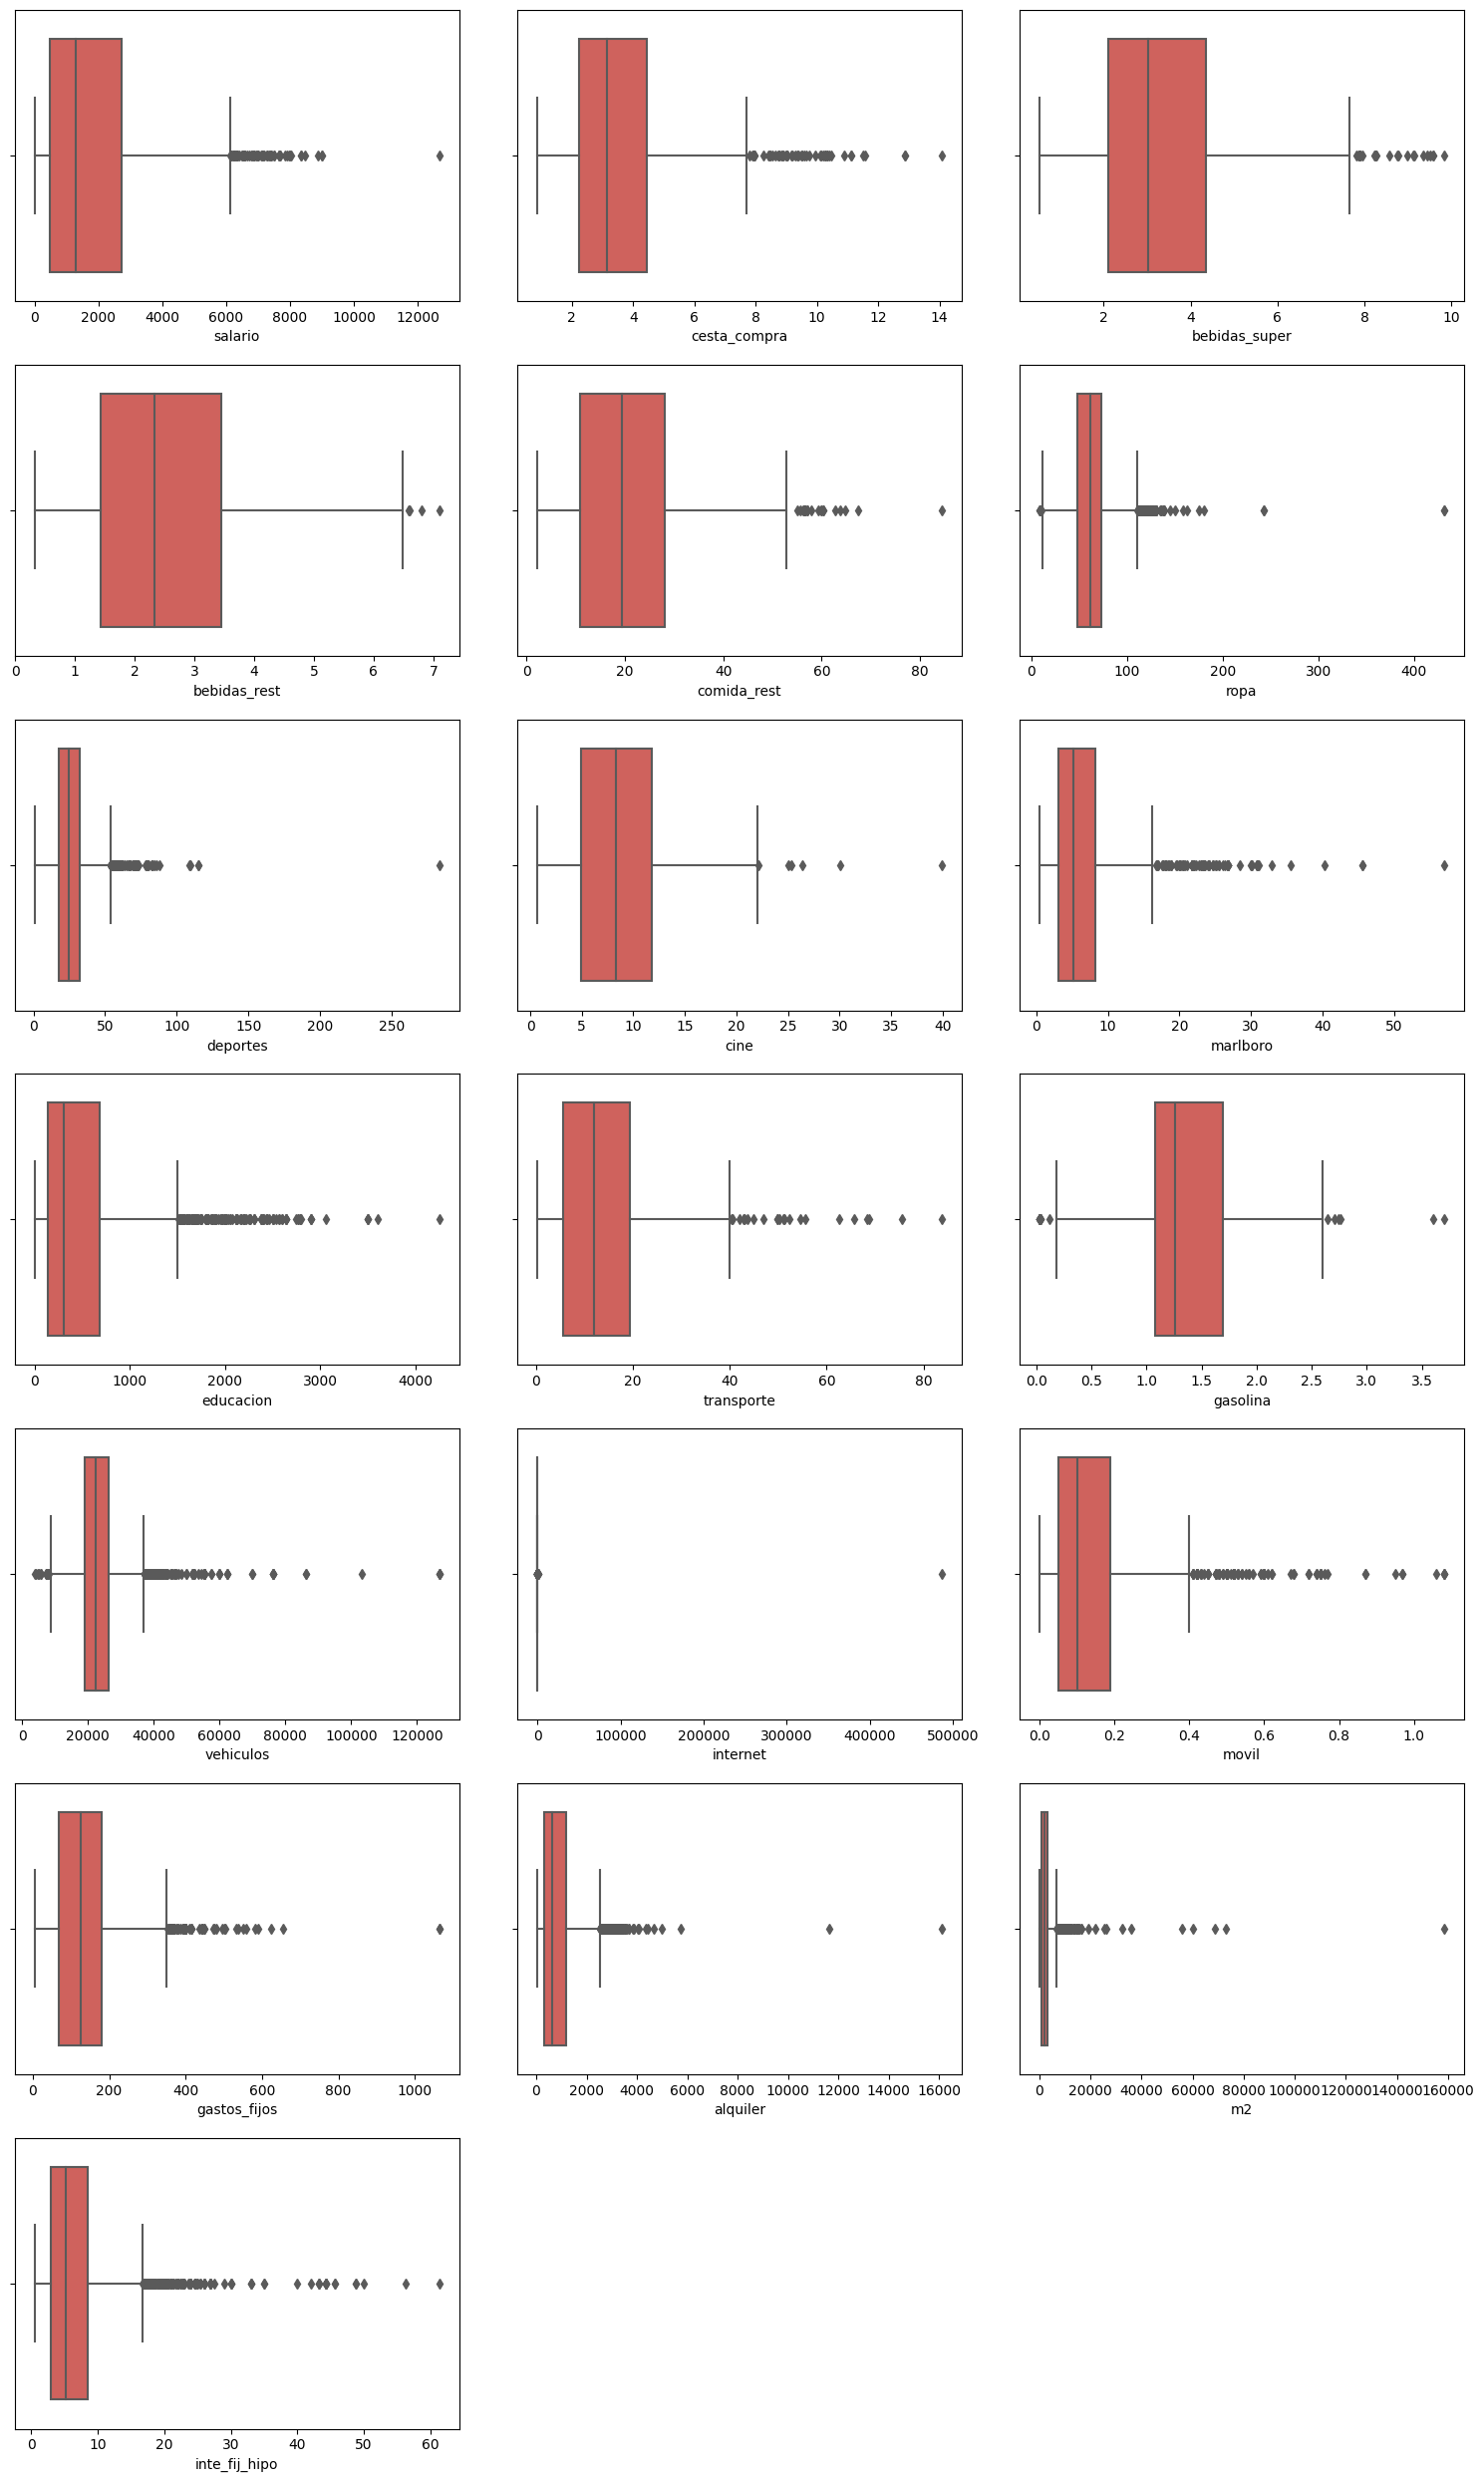

In [44]:
fig, axes = plt.subplots(7, 3, figsize=(15, 25))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_final, ax=axes[indice], palette = qualitative_colors); 
#plt.title("Outliers por gestionar")
plt.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
#ax = plt.gca()
#ax.set_title("Gráfico de Caja", fontsize=14, fontweight="bold", y=1.02)
plt.savefig("../graficas/01_EDA_outliers.png")
plt.show()

In [45]:
df_final["salario"].max()


12681.26

In [46]:
salario = df_final[df_final["salario"] == 12681.26]
salario

ciudad           pais continente  salario  cesta_compra  bebidas_super  \
3386  Schaan  Liechtenstein     Europa 12681.26          6.16           5.25   

      bebidas_rest  comida_rest  ropa  deportes  cine  marlboro  educacion  \
3386          3.70        30.65 95.72     36.92 19.02      9.51     237.77   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
3386       15.87      1.74   32945.38     53.54   0.16        192.71   

      alquiler      m2  inte_fij_hipo  
3386   1430.40 3314.16           7.12

In [47]:
df_final["cesta_compra"].max()

14.06857142857143

In [48]:
cesta = df_final[df_final["cesta_compra"] == 14.06857142857143]
cesta

ciudad         pais continente  salario  cesta_compra  bebidas_super  \
3275  Schwyz  Switzerland     Europa  7362.18         14.07           4.54   

      bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
3275          5.50        51.96 104.35     33.56 19.02      9.51    2536.25   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
3275       19.87      1.90   27479.24     73.97   0.32        263.00   

      alquiler      m2  inte_fij_hipo  
3275   1924.33 6340.64           2.00

In [49]:
df_final["bebidas_super"].max()

9.8225

In [50]:
bebidas = df_final[df_final["bebidas_super"] == 9.8225]
bebidas

ciudad           pais         continente  salario  cesta_compra  \
2909  Levittown  United States  América del Norte  2009.83          4.50   

      bebidas_super  bebidas_rest  comida_rest  ropa  deportes  cine  \
2909           9.82          3.46        28.26 66.25     33.30 18.00   

      marlboro  educacion  transporte  gasolina  vehiculos  internet  movil  \
2909     11.00    1132.77       31.19      1.80   22087.40     35.00   0.15   

      gastos_fijos  alquiler      m2  inte_fij_hipo  
2909        178.91   1548.96 5764.09           4.32

In [51]:
df_final["bebidas_rest"].max()

7.1

In [52]:
bebid_r = df_final[df_final["bebidas_rest"] == 7.1]
bebid_r

ciudad           pais         continente  salario  \
3039  South Miami Heights  United States  América del Norte  2800.00   

      cesta_compra  bebidas_super  bebidas_rest  comida_rest  ropa  deportes  \
3039          9.01           3.28          7.10        28.83 77.92     39.42   

      cine  marlboro  educacion  transporte  gasolina  vehiculos  internet  \
3039  9.00      9.50     813.06       13.04      1.22   29062.37     72.50   

      movil  gastos_fijos  alquiler      m2  inte_fij_hipo  
3039   0.12         90.00   1362.50 3194.25           4.66

In [53]:
df_final["comida_rest"].max()

84.36333333333333

In [54]:
comida_rest = df_final[df_final["comida_rest"] == 84.36333333333333]
comida_rest

ciudad         pais continente  salario  cesta_compra  bebidas_super  \
4621  Mendrisio  Switzerland     Europa  3302.41          3.86           2.30   

      bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
4621          4.20        84.36 118.49     28.59  8.48      8.06     959.95   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
4621       19.09      1.84   20535.47     42.22   0.16        264.19   

      alquiler      m2  inte_fij_hipo  
4621   1281.34 8322.08           1.40

In [55]:
df_final["ropa"].max()

431.3075

In [56]:
ropa_out = df_final[df_final["ropa"] == 431.3075]
ropa_out

ciudad  pais continente  salario  cesta_compra  bebidas_super  \
296    Tabriz  Iran       Asia   880.01          8.47           1.45   
659  Orumiyeh  Iran       Asia   450.00          2.39           0.93   

     bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
296          2.87        24.67 431.31     44.93  3.56     14.23     145.26   
659          1.03         9.50 431.31     21.26  3.00      2.00     145.26   

     transporte  gasolina  vehiculos  internet  movil  gastos_fijos  alquiler  \
296        3.35      0.73  126801.33     35.79   0.04         49.46    723.56   
659        6.89      0.73  126801.33     35.79   0.04         15.00    409.72   

         m2  inte_fij_hipo  
296 6292.46          19.38  
659  600.00          19.38

Aquí nos llama la atención que el valor outlier la variable "ropa" de la ciudad Tabriz corresponda exactamente igual al de la ciudad Orumiyeh y que también coincidan los mismos valores en otras variables. Hemos comprobado que antes de gestionar los nulos niguno de estos valores lo fueran. Por lo tanto, nos sorprende la coincidencia. Al comprobar los precios de algunos artículos de ropa en Irán para ver si se había producido un error al cambiar de moneda, pero nos hemos dado cuenta de que podría tener sentido ese precio, ya que los artículos que se incluyen en esta variable como la marca Levis no distribuye en Irán por lo que puede tener sentido que el precio pueda ser tan caro en general por el difícil acceso.
(https://www.levi.com/ES/es_ES/store-finder/store-directory)

In [57]:
df_final["deportes"].max()

283.045

In [58]:
deportes_out = df_final[df_final["deportes"] == 283.045]
deportes_out

ciudad    pais continente  salario  cesta_compra  bebidas_super  \
522  Monaco  Monaco     Europa  5389.10          4.81           5.26   

     bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
522          6.14        63.71 145.68    283.05 10.39     10.39     889.18   

     transporte  gasolina  vehiculos  internet  movil  gastos_fijos  alquiler  \
522       25.49      1.90   21293.28     56.78   0.15        181.55  11653.38   

          m2  inte_fij_hipo  
522 68727.10           1.88

In [59]:
df_final["cine"].max()

39.92

In [60]:
cine_out = df_final[df_final["cine"] == 39.92]
cine_out

ciudad          pais continente  salario  cesta_compra  \
4562  Al Hawiyah  Saudi Arabia       Asia   532.20          2.55   

      bebidas_super  bebidas_rest  comida_rest  ropa  deportes  cine  \
4562           2.56          1.10        10.51 40.58     59.88 39.92   

      marlboro  educacion  transporte  gasolina  vehiculos  internet  movil  \
4562      3.99     106.44       16.71      0.35   23283.87     62.00   0.15   

      gastos_fijos  alquiler      m2  inte_fij_hipo  
4562         93.14    156.34 1704.58           5.00

Hemos comprobado el precio de la entrada en Arabia Saudí y corresponde a riyals. Por lo que podemos deducir que probablemente este outlier provenga de un error en la toma de datos al no haber realizado el cambio de moneda correctamente.
(https://ksa.voxcinemas.com/booking/373f7165-2b28-4884-b2b1-c375ad35a7d2/seats#seats)

In [61]:
df_final["marlboro"].max()

56.98

In [62]:
marlboro_out = df_final[df_final["marlboro"] == 56.98]
marlboro_out

ciudad          pais continente  salario  cesta_compra  bebidas_super  \
1540  Dasoguz  Turkmenistan       Asia   242.17          3.64           4.45   

      bebidas_rest  comida_rest  ropa  deportes  cine  marlboro  educacion  \
1540          1.91        14.38 66.30     15.83  6.61     56.98     621.70   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
1540       14.46      1.21   19070.17     40.69   0.05        132.25   

      alquiler      m2  inte_fij_hipo  
1540   1401.81 1848.67           8.00

En  un principio hemos visto que tenga sentido que tenga el precio de Marlboro a 56.98 USD en Dasoguz porque está prohibido tanto la venta como la producción y la cosecha el tabaco desde el año 2016 debido a la dictadura.
(https://www.lainformacion.com/economia-negocios-y-finanzas/turkmenistan-con-la-tasa-mas-baja-de-fumadores-prohibe-vender-tabaco_GFaG2LXQMv1j2ckZRCIU67/)
Sin embargo, hemos comprobado el precio actual de Marlboro en Asjabad, capital de Turkmenistan, y hemos visto que el precio es de 66 Manat, por lo que podría tratarse en realidad de un error en la toma de datos al hacer el cambio de moneda.
(https://www.expatistan.com/es/precio/cigarrillos/asjabad/GBP)

In [63]:
df_final["educacion"].max()

4250.0

In [64]:
educacion_out = df_final[df_final["educacion"] == 4250.0]
educacion_out

ciudad           pais         continente  salario  cesta_compra  \
1962  Lakewood  United States  América del Norte  4700.00          5.74   

      bebidas_super  bebidas_rest  comida_rest  ropa  deportes  cine  \
1962           5.12          3.59        20.83 56.04     34.86 13.50   

      marlboro  educacion  transporte  gasolina  vehiculos  internet  movil  \
1962     10.00    4250.00       18.51      1.29   21810.00     67.00   0.15   

      gastos_fijos  alquiler      m2  inte_fij_hipo  
1962        134.82   2003.12 2371.54           3.60

In [65]:
df_final["transporte"].max()

83.74

In [66]:
transporte_out = df_final[df_final["transporte"] == 83.74]
transporte_out

ciudad         pais continente  salario  cesta_compra  bebidas_super  \
2731  Zaandam  Netherlands     Europa  2358.36          3.66           2.69   

      bebidas_rest  comida_rest  ropa  deportes  cine  marlboro  educacion  \
2731          3.38        33.40 57.53     25.36 12.46      8.52     470.71   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
2731       83.74      2.13   35103.62     46.74   0.17        183.57   

      alquiler      m2  inte_fij_hipo  
2731   1177.19 4907.84           1.75

In [67]:
df_final["gasolina"].max()

3.7

In [68]:
gasolina = df_final[df_final["gasolina"] == 3.7]
gasolina             

ciudad                              pais         continente  salario  \
543  Kingstown  Saint Vincent And The Grenadines  América del Norte   555.03   

     cesta_compra  bebidas_super  bebidas_rest  comida_rest  ropa  deportes  \
543          4.67           5.09          2.30        28.68 91.25     14.80   

     cine  marlboro  educacion  transporte  gasolina  vehiculos  internet  \
543  5.55      4.44     123.34       12.09      3.70   11100.62     45.64   

     movil  gastos_fijos  alquiler      m2  inte_fij_hipo  
543   0.26         54.27    545.40 2123.17           9.50

In [69]:
df_final["vehiculos"].max()

126801.33499999999

In [70]:
vehiculos = df_final[df_final["vehiculos"] == 126801.33499999999]
vehiculos       

ciudad  pais continente  salario  cesta_compra  bebidas_super  \
296     Tabriz  Iran       Asia   880.01          8.47           1.45   
659   Orumiyeh  Iran       Asia   450.00          2.39           0.93   
1889   Mahabad  Iran       Asia   357.50          3.25           0.92   

      bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
296           2.87        24.67 431.31     44.93  3.56     14.23     145.26   
659           1.03         9.50 431.31     21.26  3.00      2.00     145.26   
1889          1.26         8.05  56.66     23.08  2.00      2.54     145.26   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
296         3.35      0.73  126801.33     35.79   0.04         49.46   
659         6.89      0.73  126801.33     35.79   0.04         15.00   
1889        8.50      0.73  126801.33     10.00   0.00         49.46   

      alquiler      m2  inte_fij_hipo  
296     723.56 6292.46          19.38  
659     409.72  600.00          19.38  
1889    227.38  925.00          14.00

Teniendo en cuenta que 	Orumiyeh es una ciudad tan hermética debido a su dictadura, podemos inferir que quizá los datos no sean reales. Además, comprobando los precios de los vehículos catalogados en esta variable, hemos visto que el precio en Irán no varía tanto como el resultado que hemos obtenido en estas ciudades, sin embargo, sí se asemeja al precio con la moneda iraní, por lo que puede haberse producido un error al tomar los datos y realizar el cambio de moneda.
(https://motowheeler.com/ir/cars/toyota-corolla-sedan-994.php)
 En consecuencia, lo tendremos en cuenta a la hora de gestionar los outliers.

In [71]:
df_final["internet"].max()

486391.79

In [72]:
internet = df_final[df_final["internet"] == 486391.79]
internet 

ciudad             pais continente  salario  cesta_compra  \
521  Honiara  Solomon Islands    Oceanía   719.45          2.98   

     bebidas_super  bebidas_rest  comida_rest  ropa  deportes  cine  marlboro  \
521           5.11          3.06        25.13 62.62     33.44  4.26      3.89   

     educacion  transporte  gasolina  vehiculos  internet  movil  \
521     121.60        9.83      1.22   31207.38 486391.79   0.12   

     gastos_fijos  alquiler       m2  inte_fij_hipo  
521          6.08   1198.25 72958.71          13.50

Después de comprobar el precio de internet en Honiara, creemos que se ha producido un error al tomar los datos, probablemente en al realizar el cambio de moneda.
(https://isp.page/es/list-of-all-services/SOLOMON-ISLANDS,toic-6,all-1,c-2)
Entonces, lo tendremos en cuenta a la hora de gestionar los outliers.

In [73]:
df_final["movil"].max()

1.08

In [74]:
movil = df_final[df_final["movil"] == 1.08]
movil                

ciudad   pais continente  salario  cesta_compra  bebidas_super  \
795   Hachioji  Japan       Asia  1895.07          3.10           2.60   
1095  Shinjuku  Japan       Asia  3205.79          4.31           3.64   
1173  Koriyama  Japan       Asia  2088.58          2.91           2.84   

      bebidas_rest  comida_rest  ropa  deportes  cine  marlboro  educacion  \
795           2.30        12.99 50.59     33.73 12.99      5.05     425.29   
1095          4.33        13.11 67.20     30.06 12.99      7.58     755.64   
1173          2.30        12.51 58.96     43.39  8.66      7.33     514.58   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
795        10.99      1.20   25112.14     28.88   1.08        237.78   
1095       14.59      1.20   26022.77     25.27   1.08        237.78   
1173        7.58      1.20   39551.91     36.10   1.08        237.78   

      alquiler      m2  inte_fij_hipo  
795     586.55 3414.88          11.51  
1095   1388.83 4673.76           7.66  
1173    770.57 2250.15          13.79

Comprobamos que los valores que coinciden corresponde con los nulos gestionados que se les ha sustituido por la mediana.

In [75]:
df_final["gastos_fijos"].max()

1063.63

In [76]:
gastos_fijos = df_final[df_final["gastos_fijos"] == 1063.63]
gastos_fijos      

ciudad          pais continente  salario  cesta_compra  bebidas_super  \
535   Ashgabat  Turkmenistan       Asia   560.30          7.04           7.88   
4138      Kaka  Turkmenistan       Asia  1321.71          7.04           7.88   

      bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
535           6.03        60.30 243.23     60.89 14.25     45.58      22.79   
4138          6.03        60.30 243.23     25.84 14.25     45.58      22.79   

      transporte  gasolina  vehiculos  internet  movil  gastos_fijos  \
535         4.62      0.43   20559.50    338.32   0.03       1063.63   
4138        9.32      0.43   20678.14    338.32   0.03       1063.63   

      alquiler      m2  inte_fij_hipo  
535     852.32 2834.76           8.00  
4138   1126.61 4797.95           8.00

Nos llama la atención que los gastos fijos sean superiores al precio del alquiler. Hemos comprobado antes de gestionar los nulos si alguna de estas dos ciudades tenía esta variable con valor nulo y no era así. Por otro lado, comparten en más variables el mismo valor y en el caso de KaKa si contiene valores nulos tanto en las variables "alquiler", "m2", "transporte", "deportes" y "salario". Por lo que tendremos en cuenta estos factores a la hora de gestionar los outliers para la variable "gastos_fijos".

In [77]:
df_final["alquiler"].max()

16106.667500000001

In [78]:
alquiler = df_final[df_final["alquiler"] == 16106.667500000001]
alquiler         

ciudad  pais continente  salario  cesta_compra  bebidas_super  \
578  Kermanshah  Iran       Asia   492.79          2.56           0.78   

     bebidas_rest  comida_rest   ropa  deportes  cine  marlboro  educacion  \
578          1.03         7.15 113.21     23.07  1.50      1.00     108.33   

     transporte  gasolina  vehiculos  internet  movil  gastos_fijos  alquiler  \
578        2.29      0.19   57491.25     12.28   0.20         10.11  16106.67   

        m2  inte_fij_hipo  
578 766.64          19.33

Hemos comprobado los precios del alquiler en Kermanshah y son bastante más bajos del resultado que tenemos. Deducimos que se haya producido un error a la hora de realizar el cambio de moneda.
(https://www.holprop.es/alquileres/viviendas/iran/kermanshah/) Por lo tanto, lo tendremos en cuenta para gestionar este outlier.

In [79]:
df_final["m2"].max()

158348.36

In [80]:
m2 = df_final[df_final["m2"] == 158348.36]
m2

ciudad   pais continente  salario  cesta_compra  bebidas_super  \
429  Niamey  Niger     África   208.49          3.33           3.15   

     bebidas_rest  comida_rest  ropa  deportes  cine  marlboro  educacion  \
429          1.98        14.61 40.91     21.78  3.96      2.38     897.31   

     transporte  gasolina  vehiculos  internet  movil  gastos_fijos  alquiler  \
429       34.30      0.89   11415.53     11.88   0.11        369.48    493.25   

           m2  inte_fij_hipo  
429 158348.36          11.00

Después de investigar el precio de la vivienda en Niamey, a pesar de la diversidad que hay, creemos que podría haber un error en la recogida de datos en el cambio de moneda.
(https://www.properstar.es/listing/91522327)
(https://www.properstar.es/listing/89643975)
En consecuencia, lo tendremos en cuenta a la hora de gestionar los outliers.

In [81]:
df_final["inte_fij_hipo"].max()

61.33

In [82]:
inte_fij_hipo = df_final[df_final["inte_fij_hipo"] == 61.33]
inte_fij_hipo

ciudad       pais       continente  salario  cesta_compra  \
1725  La Plata  Argentina  América del Sur   435.74          2.10   

      bebidas_super  bebidas_rest  comida_rest  ropa  deportes  cine  \
1725           1.88          1.36        16.05 53.13     19.28  4.30   

      marlboro  educacion  transporte  gasolina  vehiculos  internet  movil  \
1725      1.67      50.00        2.50      0.94   20625.00     20.89   0.03   

      gastos_fijos  alquiler     m2  inte_fij_hipo  
1725         46.06    195.49 700.00          61.33

Hemos comprobado que el interés fijo de la hipoteca en La Plata y tiene sentido porque ahora está a 118 %.
(https://datosmacro.expansion.com/tipo-interes/argentina)

Hemos comprobado que los valores máximos de cada variable no proceden de la misma fila para comprobar si la toma de datos era incorrecta en algún valor. Tras comprobar esos outliers tan significativos, hemos visto que no comparten el mismo lugar de procedencia por lo que no vamos a eliminar ningún outlier, sino que vamos a tratar aquellos que creemos que se han tomado mal el dato al hacer el cambio de moneda.

In [83]:
columnas_a_corregir = ["marlboro", "vehiculos", "internet", "gastos_fijos", "alquiler", "m2"]

In [84]:
max_indices = {}

for col in columnas_a_corregir:
    max_indices[col] = df_final[df_final[col] == df_final[col].max()].index.tolist()
    
print(max_indices)


{'marlboro': [1540], 'vehiculos': [296, 659, 1889], 'internet': [521], 'gastos_fijos': [535, 4138], 'alquiler': [578], 'm2': [429]}


In [85]:
for k,v in max_indices.items():
    median = df_final[k].median()
    for i in v:
        df_final.loc[i,k] = median

```Comprobación de la gestión de outliers```

In [86]:
df_final["internet"].iloc[521]

34.845

In [87]:
df_final["internet"].max()

703.81

In [88]:
numericas2 = df_final.select_dtypes(include=['int64', 'float64'])

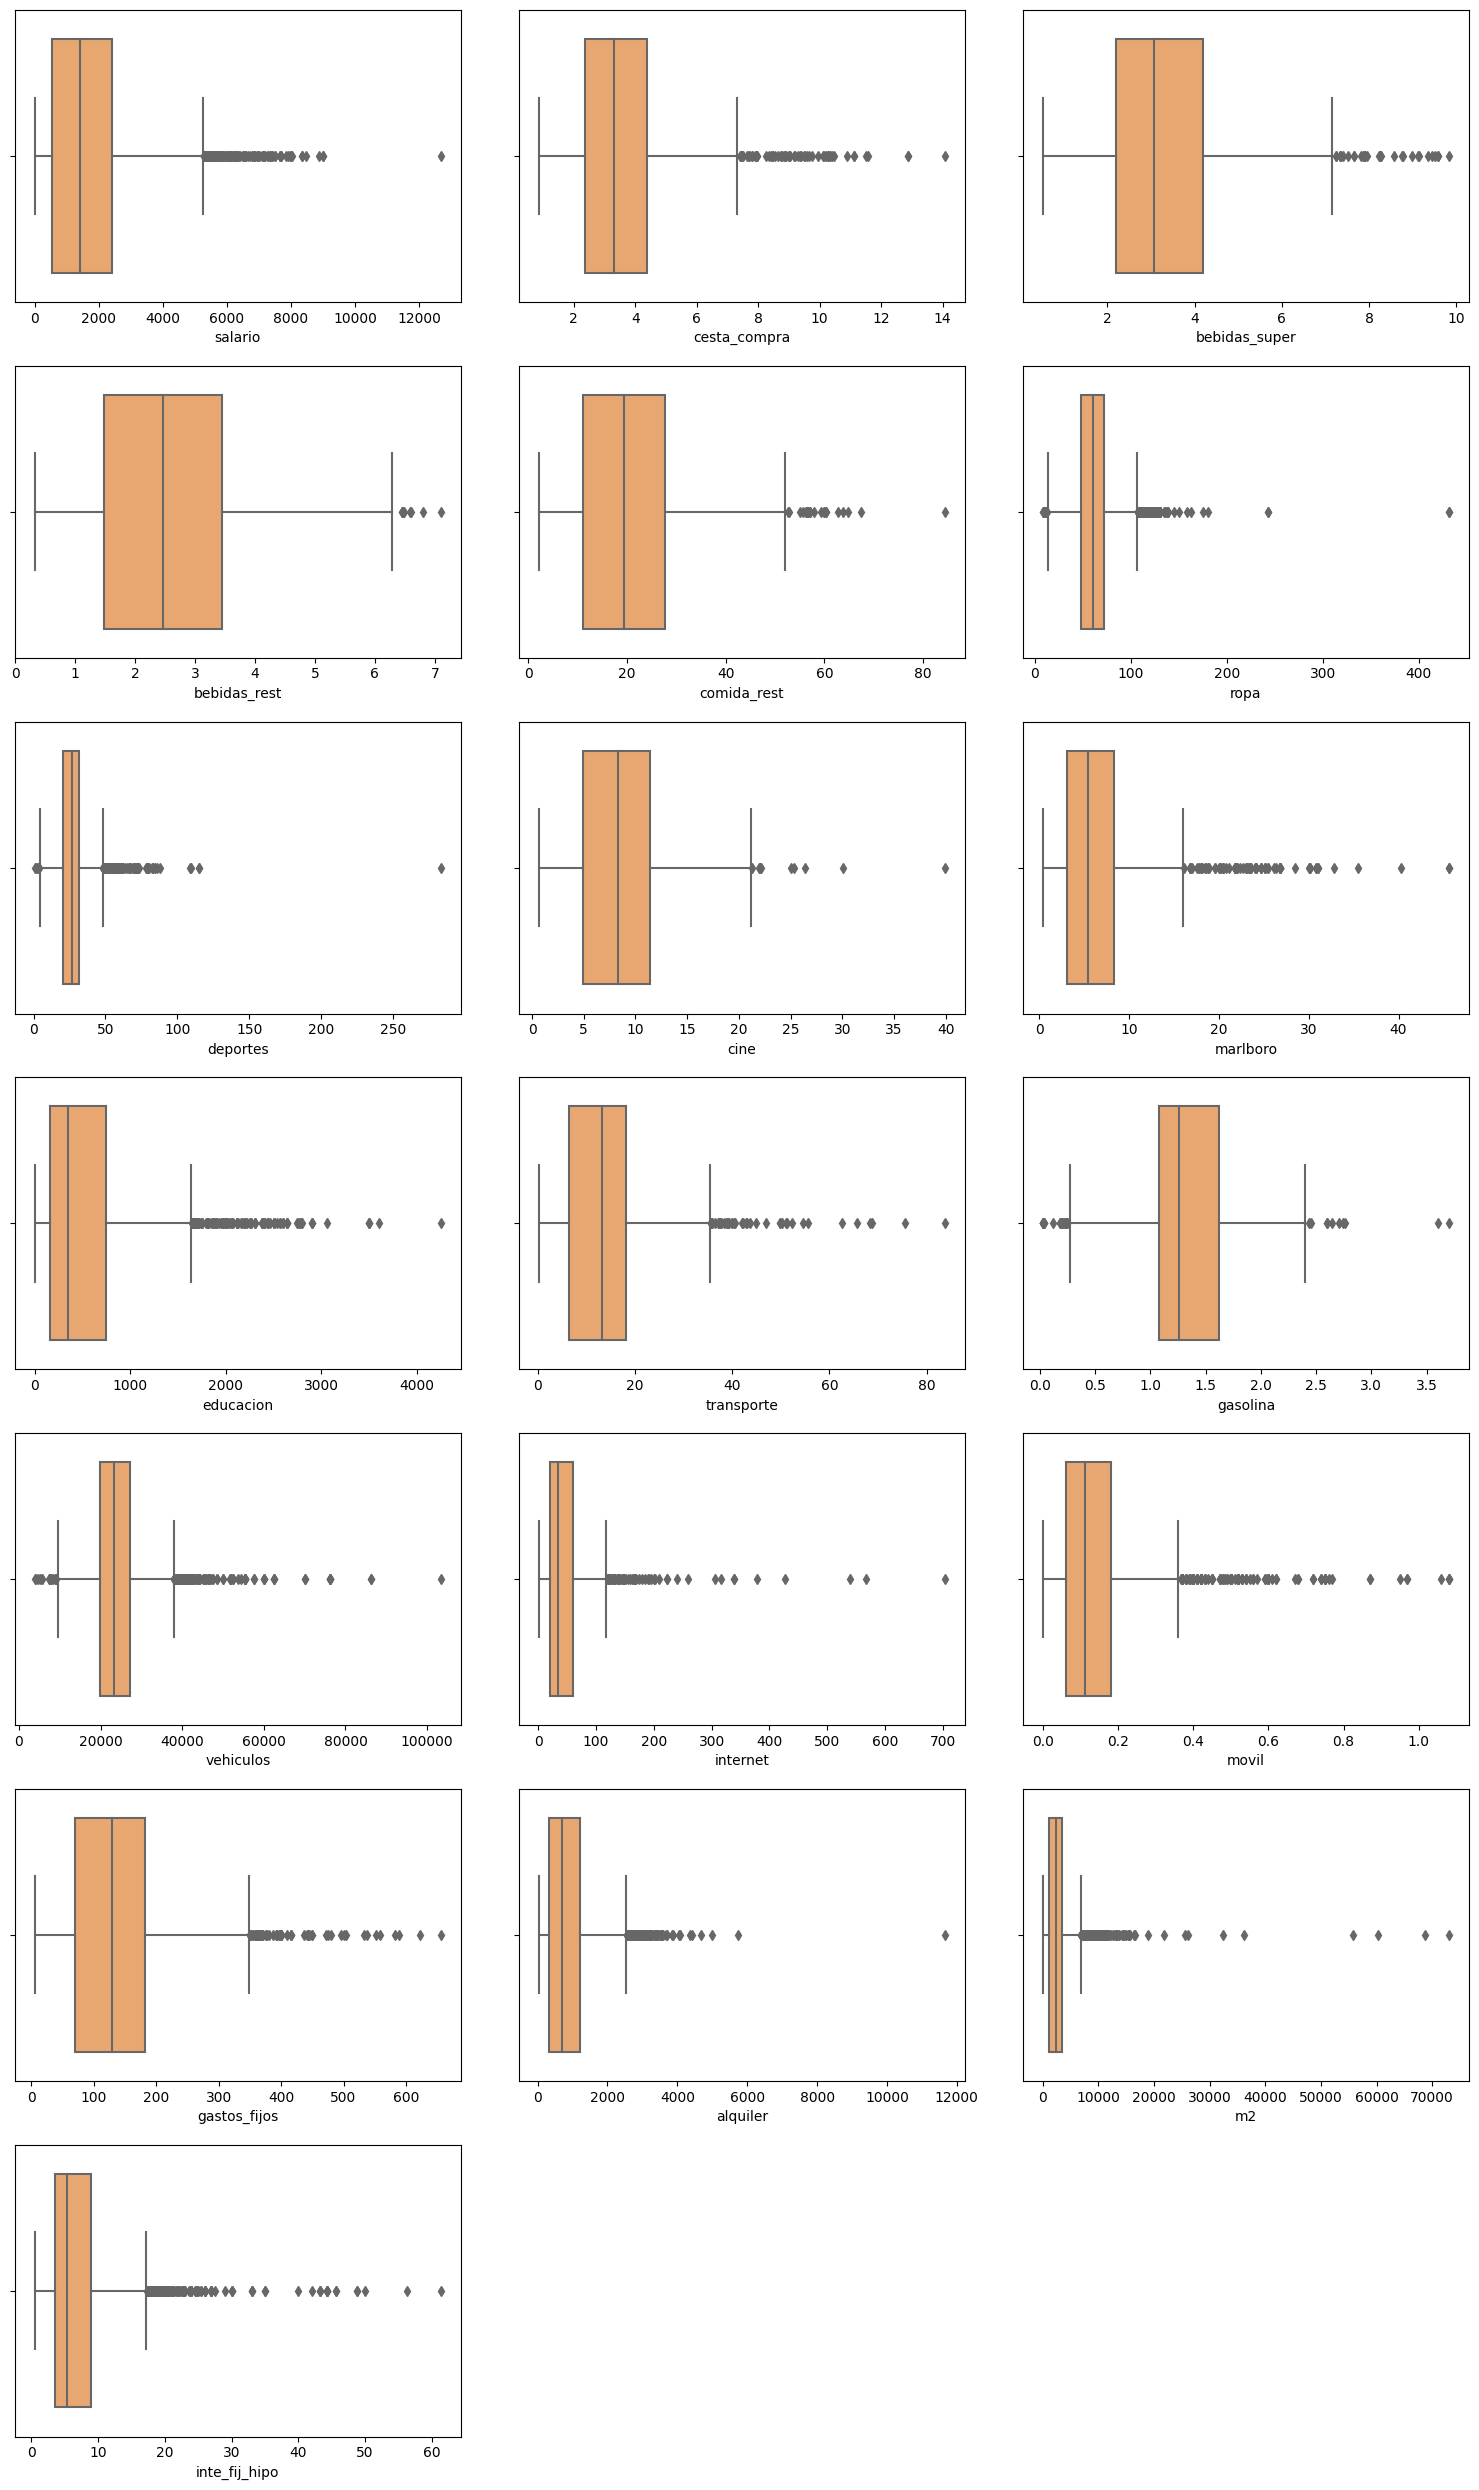

In [89]:
fig, axes = plt.subplots(7, 3, figsize=(15, 25))
axes = axes.flat
for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df_final, ax=axes[indice], color = qualitative_colors[1]); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
plt.savefig("../graficas/01_EDA_outliers_gestionados.png")
plt.show()

Esta gráfica muestra que los valores máximos que estaban tan alejados de los outliers y que no tenían sentido ya están gestionados. 

```Relación entre variables```

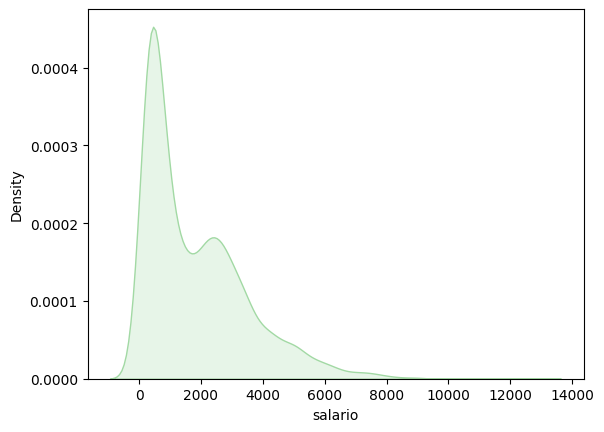

In [90]:
# Distribución variable respuesta

sns.distplot(
    df["salario"],
    hist = False,
    color = qualitative_colors[4],
    kde_kws = {"shade": True, "linewidth": 1})
plt.savefig("../graficas/01_EDA_distribucion_vr.png");

En la distribución de la variable respuesta vemos que no hay normalidad.

''

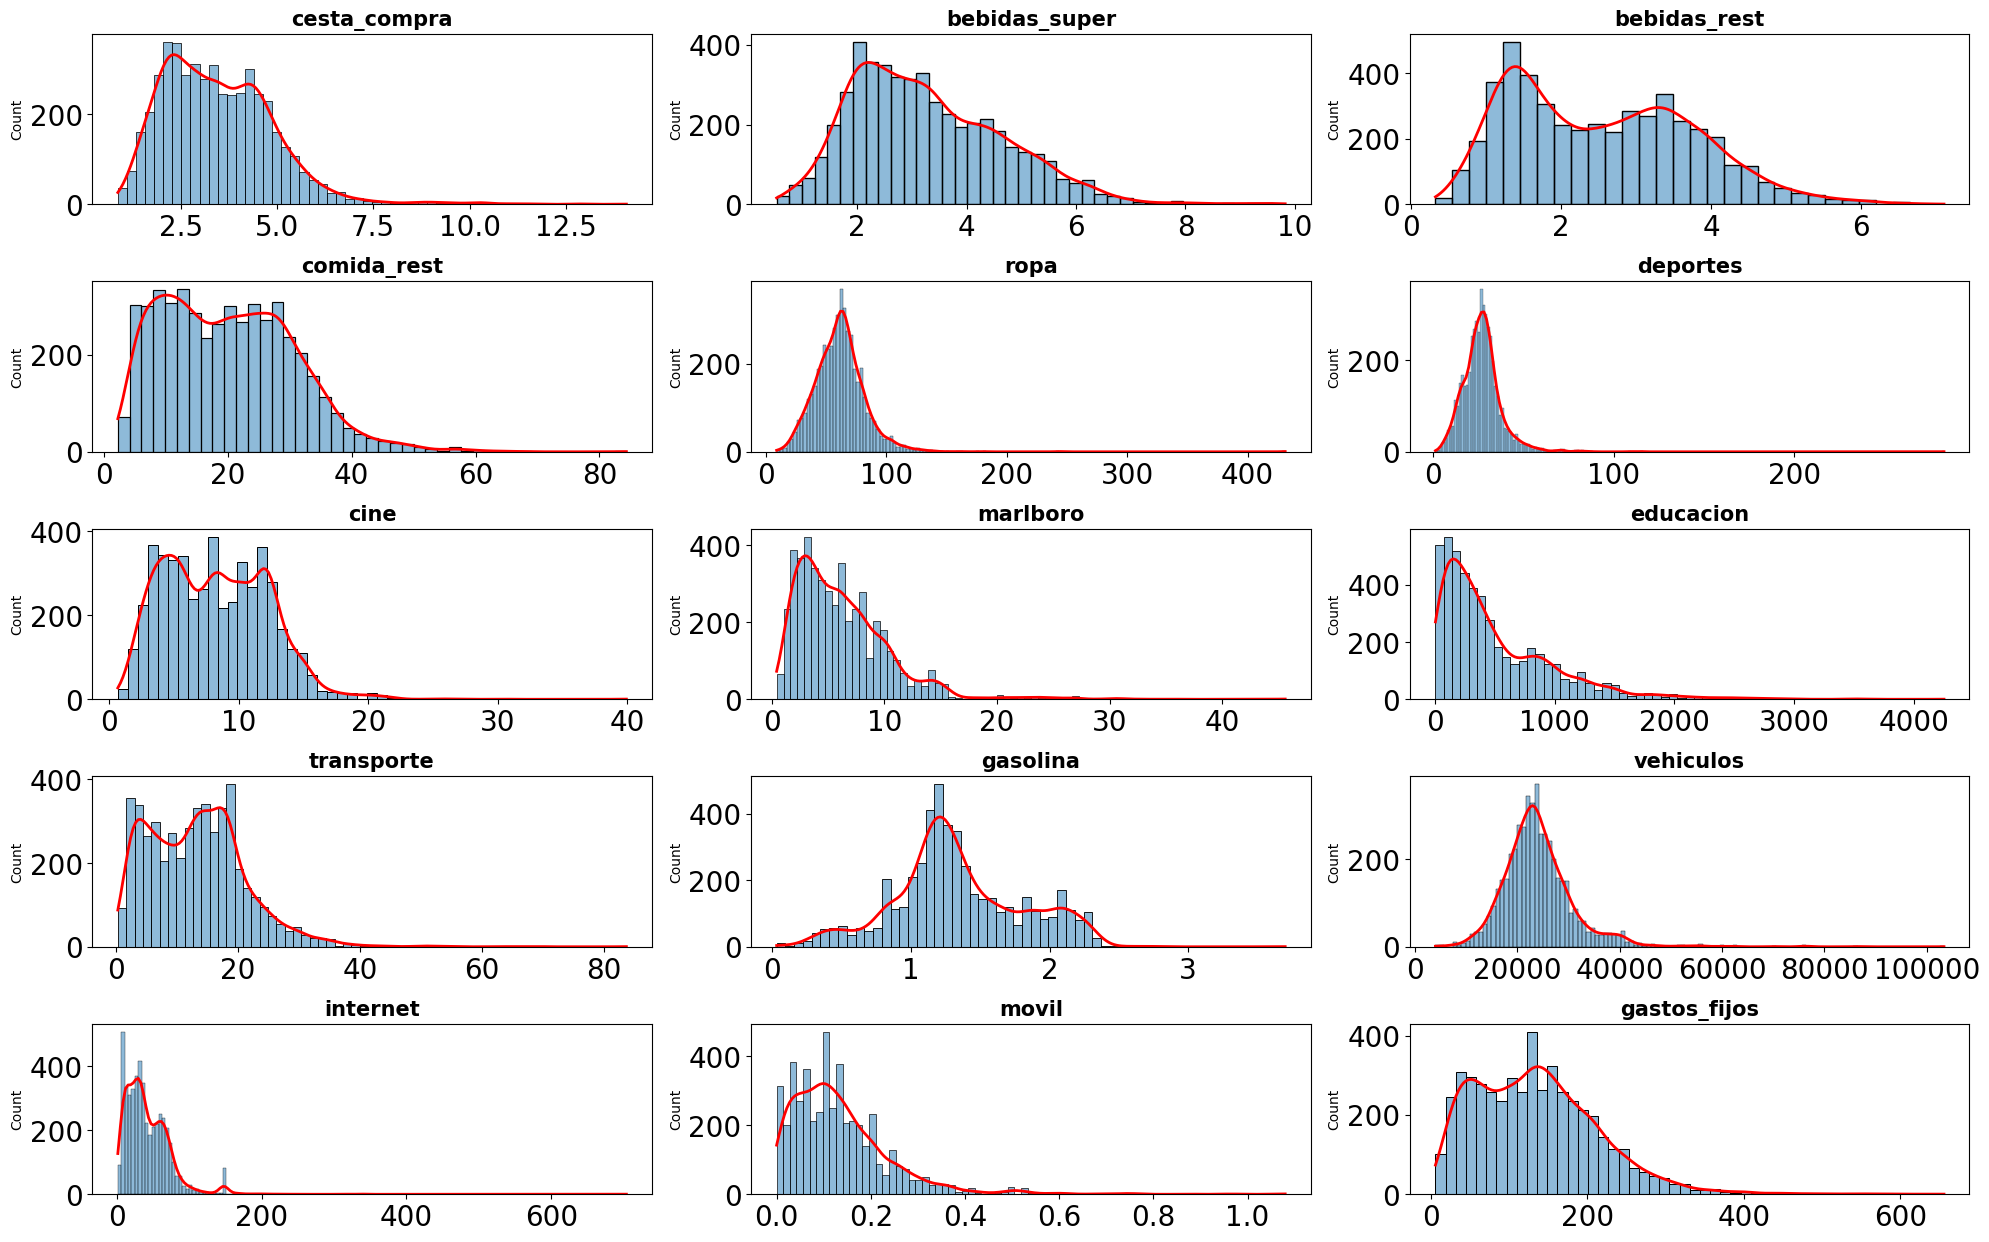

In [91]:
# Distribución de variables predictoras


fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (20, 15))
axes = axes.flat

num = df_final.select_dtypes(include = np.number).columns
num = num.drop("salario")

for i, colum in enumerate(num):
    sns.histplot(
        data = df_final,
        x = colum,
        kde = True,
        palette = qualitative_colors[4],
        line_kws = {"linewidth": 2},
        alpha = 0.5,
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].lines[0].set_color("red")
    fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])
plt.savefig("../graficas/01_EDA_distribucion_vp.png")
;

En esta gráfica vemos que todas las variables predictoras no tienen una distribución normal.

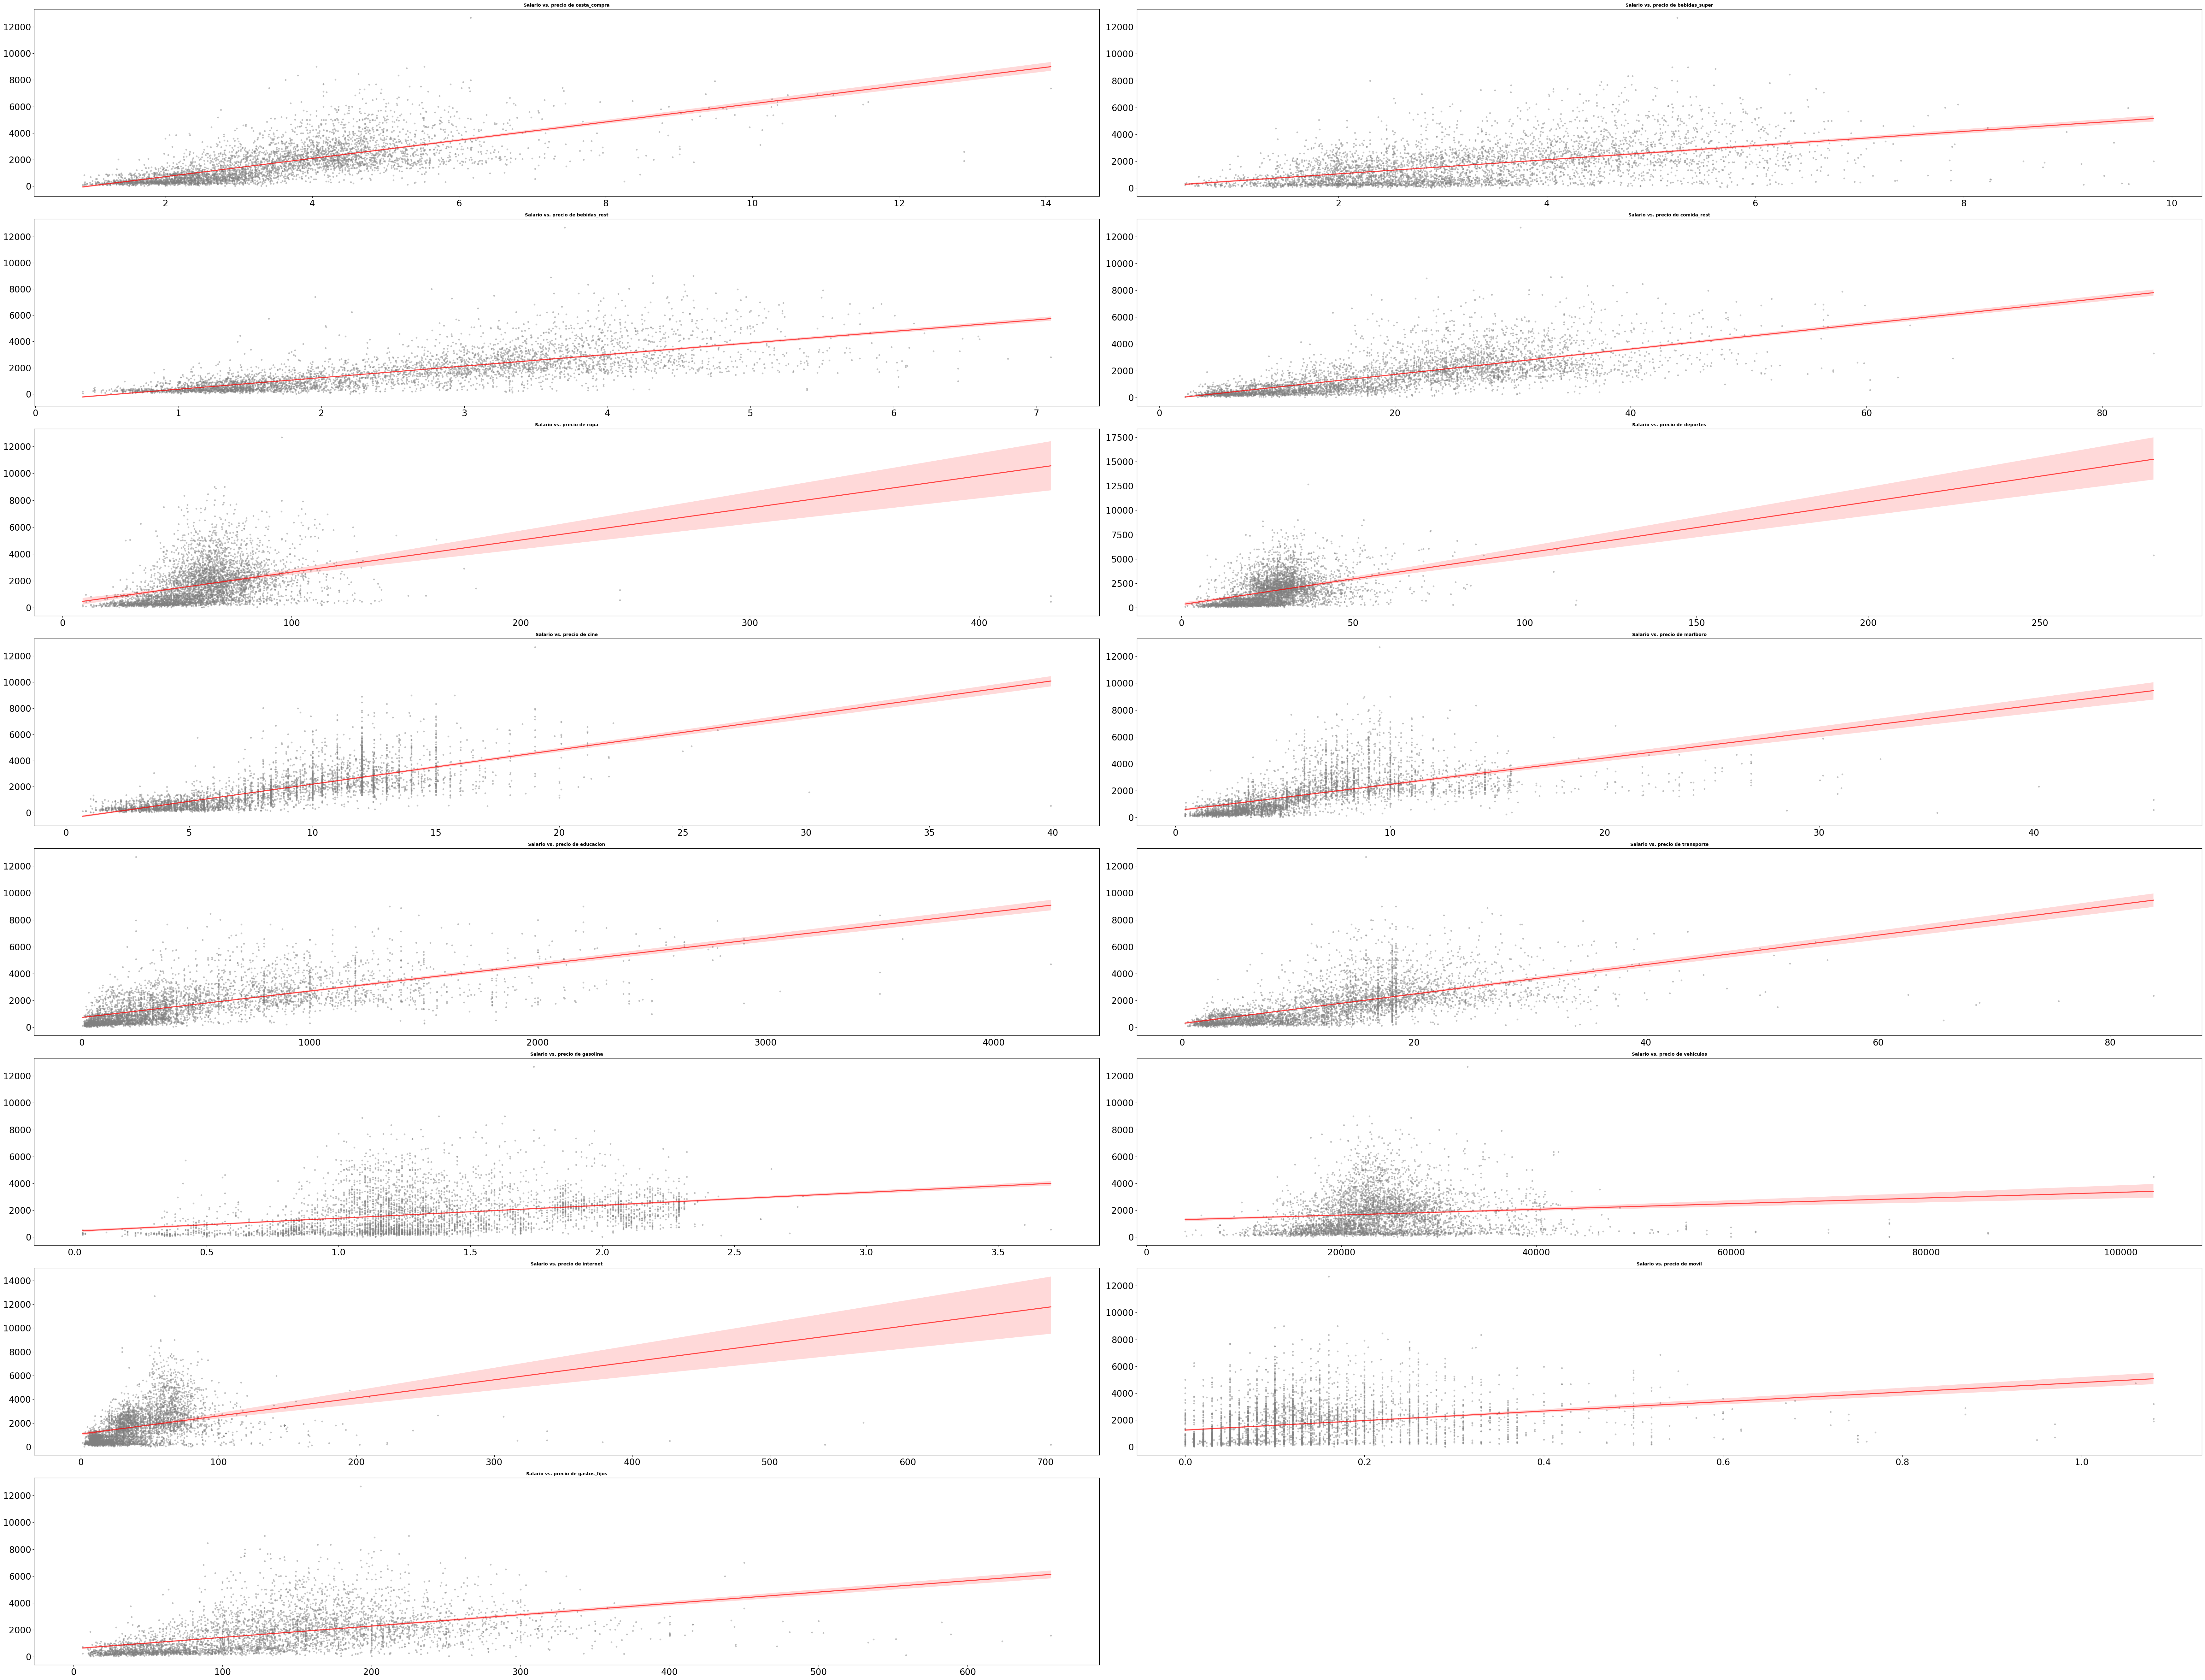

In [92]:

# Relación entre variables predictoras y variable respuesta

fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (70, 60))


axes = axes.flat

num = df_final.select_dtypes(include = np.number).columns
num = num.drop("salario")

for i, colum in enumerate(num):
    sns.regplot(
        x = df_final[colum], 
        y = df_final["salario"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Salario vs. precio de {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])
plt.savefig("../graficas/01_EDA_regplot_vr_vp.png");

In [93]:
df_final.select_dtypes(include = np.number).columns

Index(['salario', 'cesta_compra', 'bebidas_super', 'bebidas_rest',
       'comida_rest', 'ropa', 'deportes', 'cine', 'marlboro', 'educacion',
       'transporte', 'gasolina', 'vehiculos', 'internet', 'movil',
       'gastos_fijos', 'alquiler', 'm2', 'inte_fij_hipo'],
      dtype='object')

''

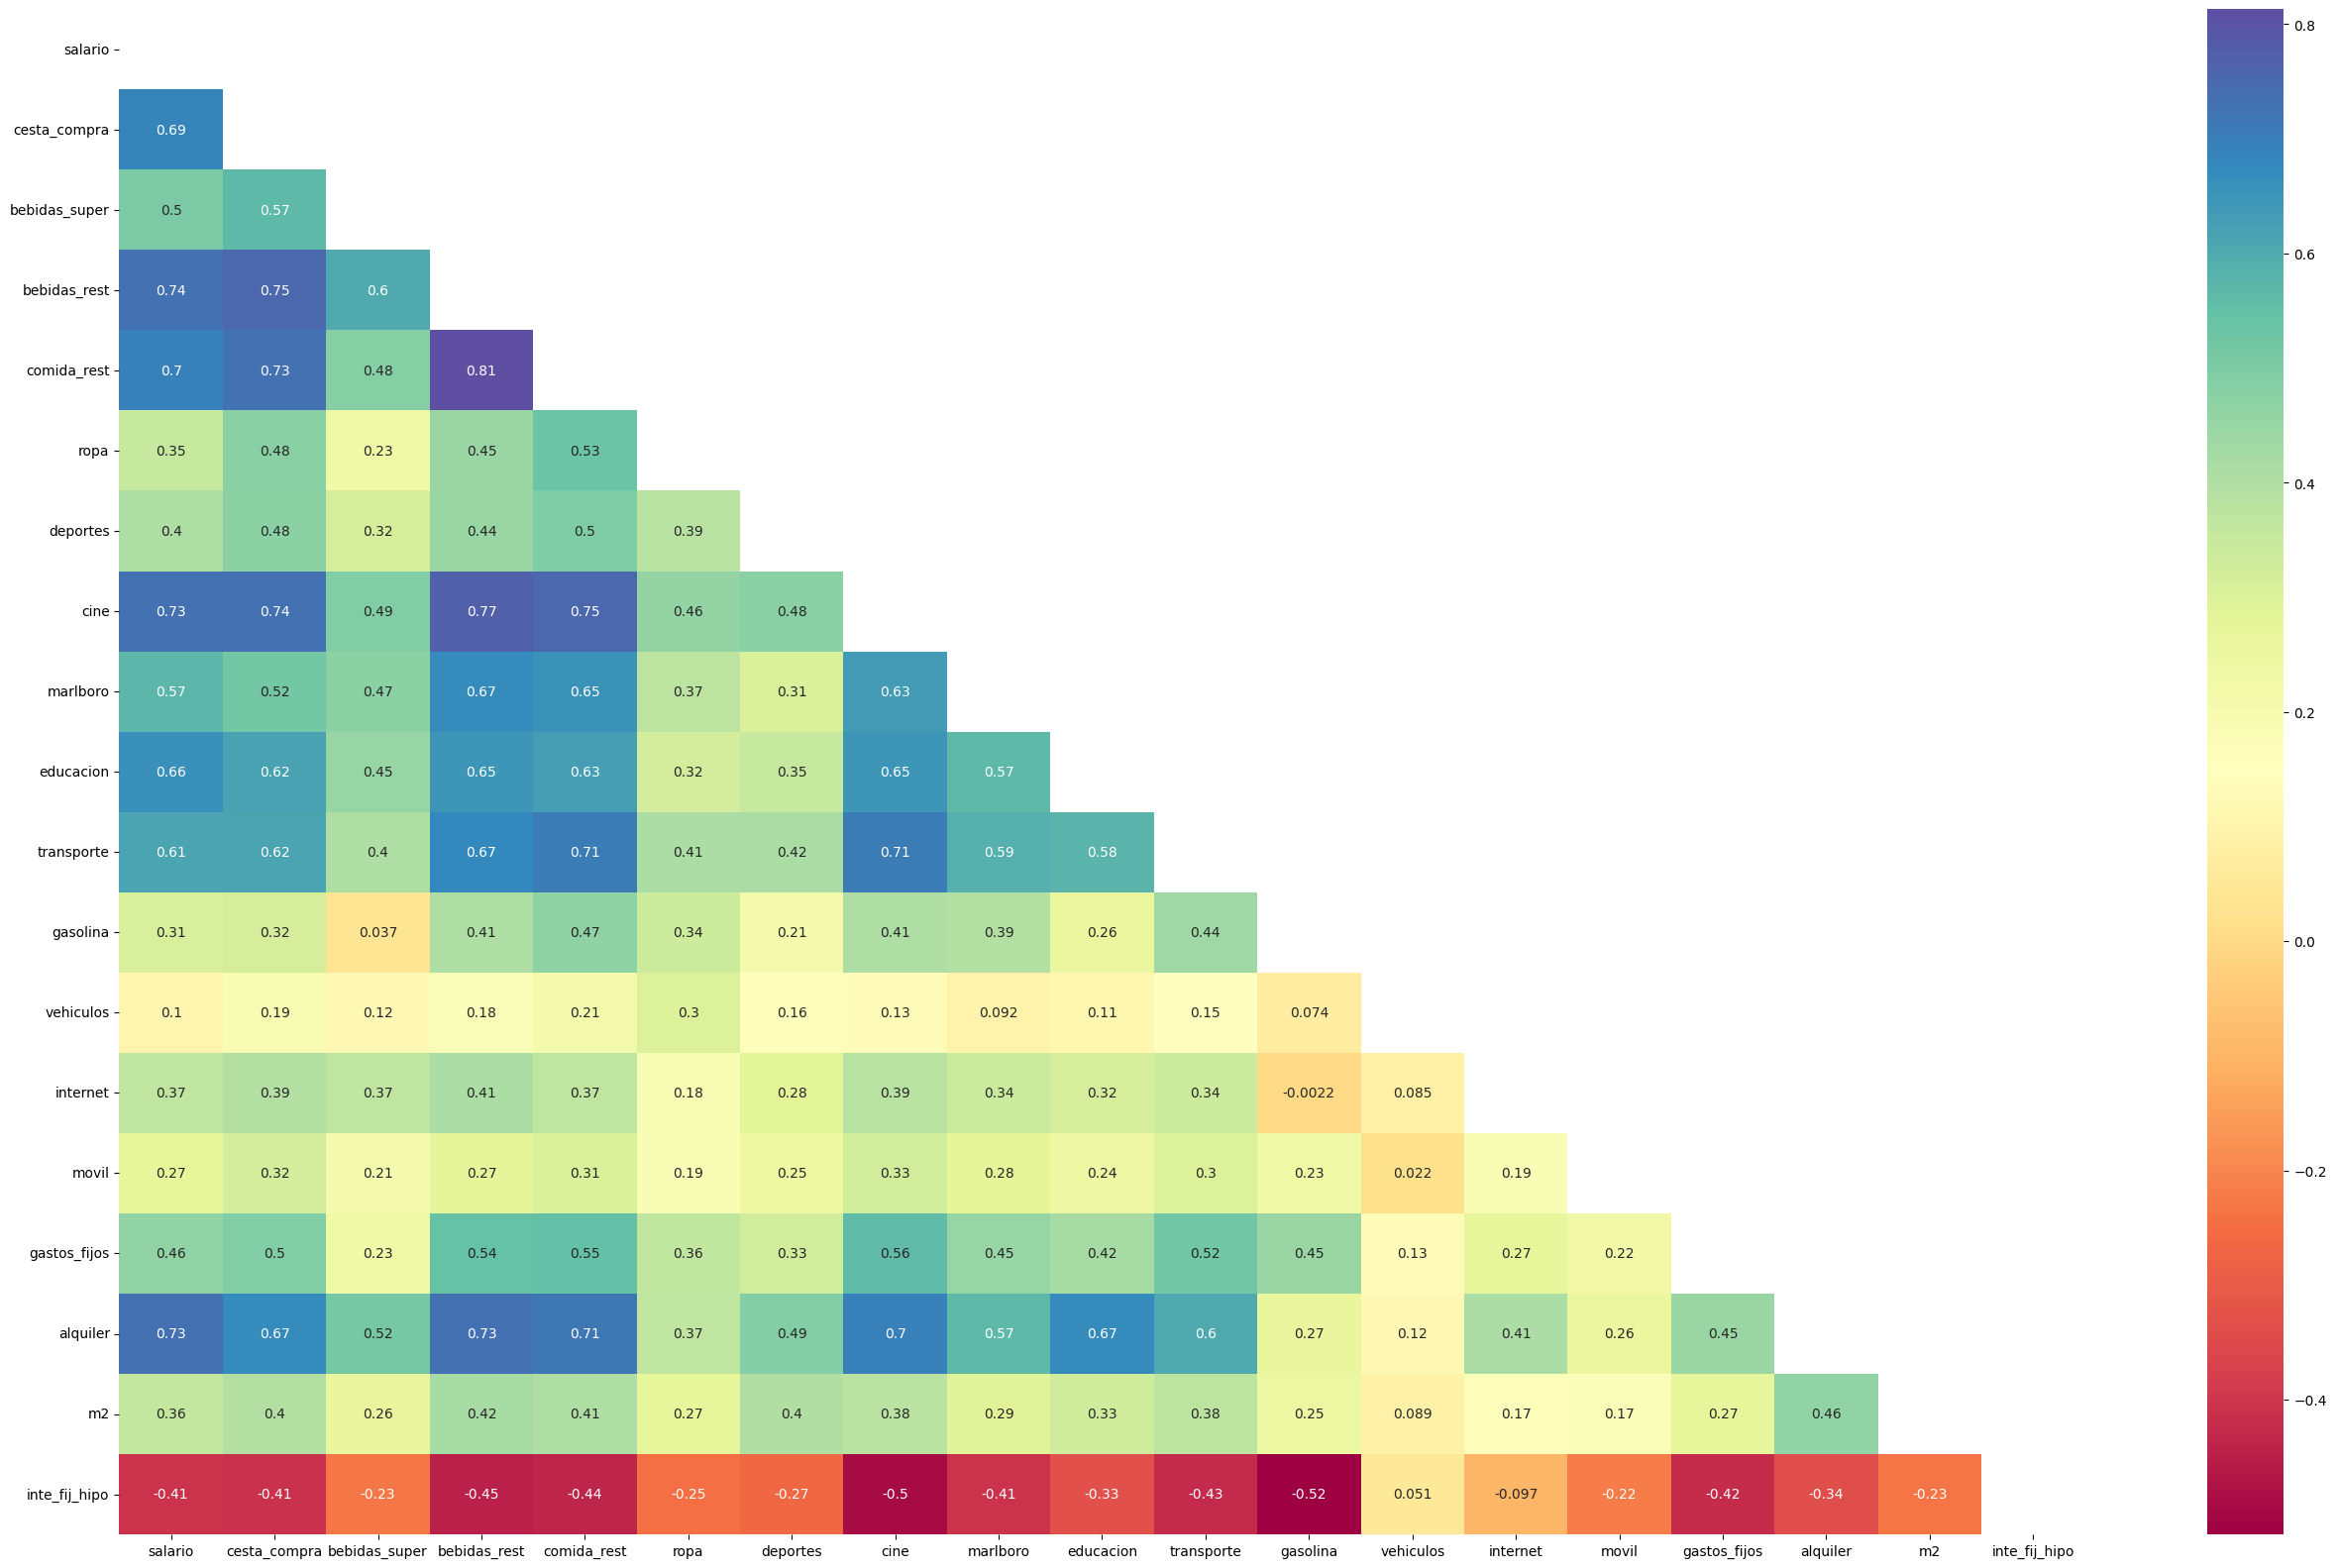

In [95]:
# Correlación de variables numéricas

mask = np.triu(np.ones_like(df_numericas.corr(), dtype = np.bool_))

plt.figure(figsize=(32,20)),
sns.heatmap(df_numericas.corr(),
            cmap = "Spectral",           
            mask = mask,
           annot = True)
plt.savefig("../graficas/01_EDA_heatmap_num.png")
;

In [96]:
df_final["continente"]

0                    Asia
1                    Asia
2                    Asia
3                    Asia
4                    Asia
              ...        
4869              Oceanía
4870              Oceanía
4871    América del Norte
4872    América del Norte
4873              Oceanía
Name: continente, Length: 4874, dtype: object

''

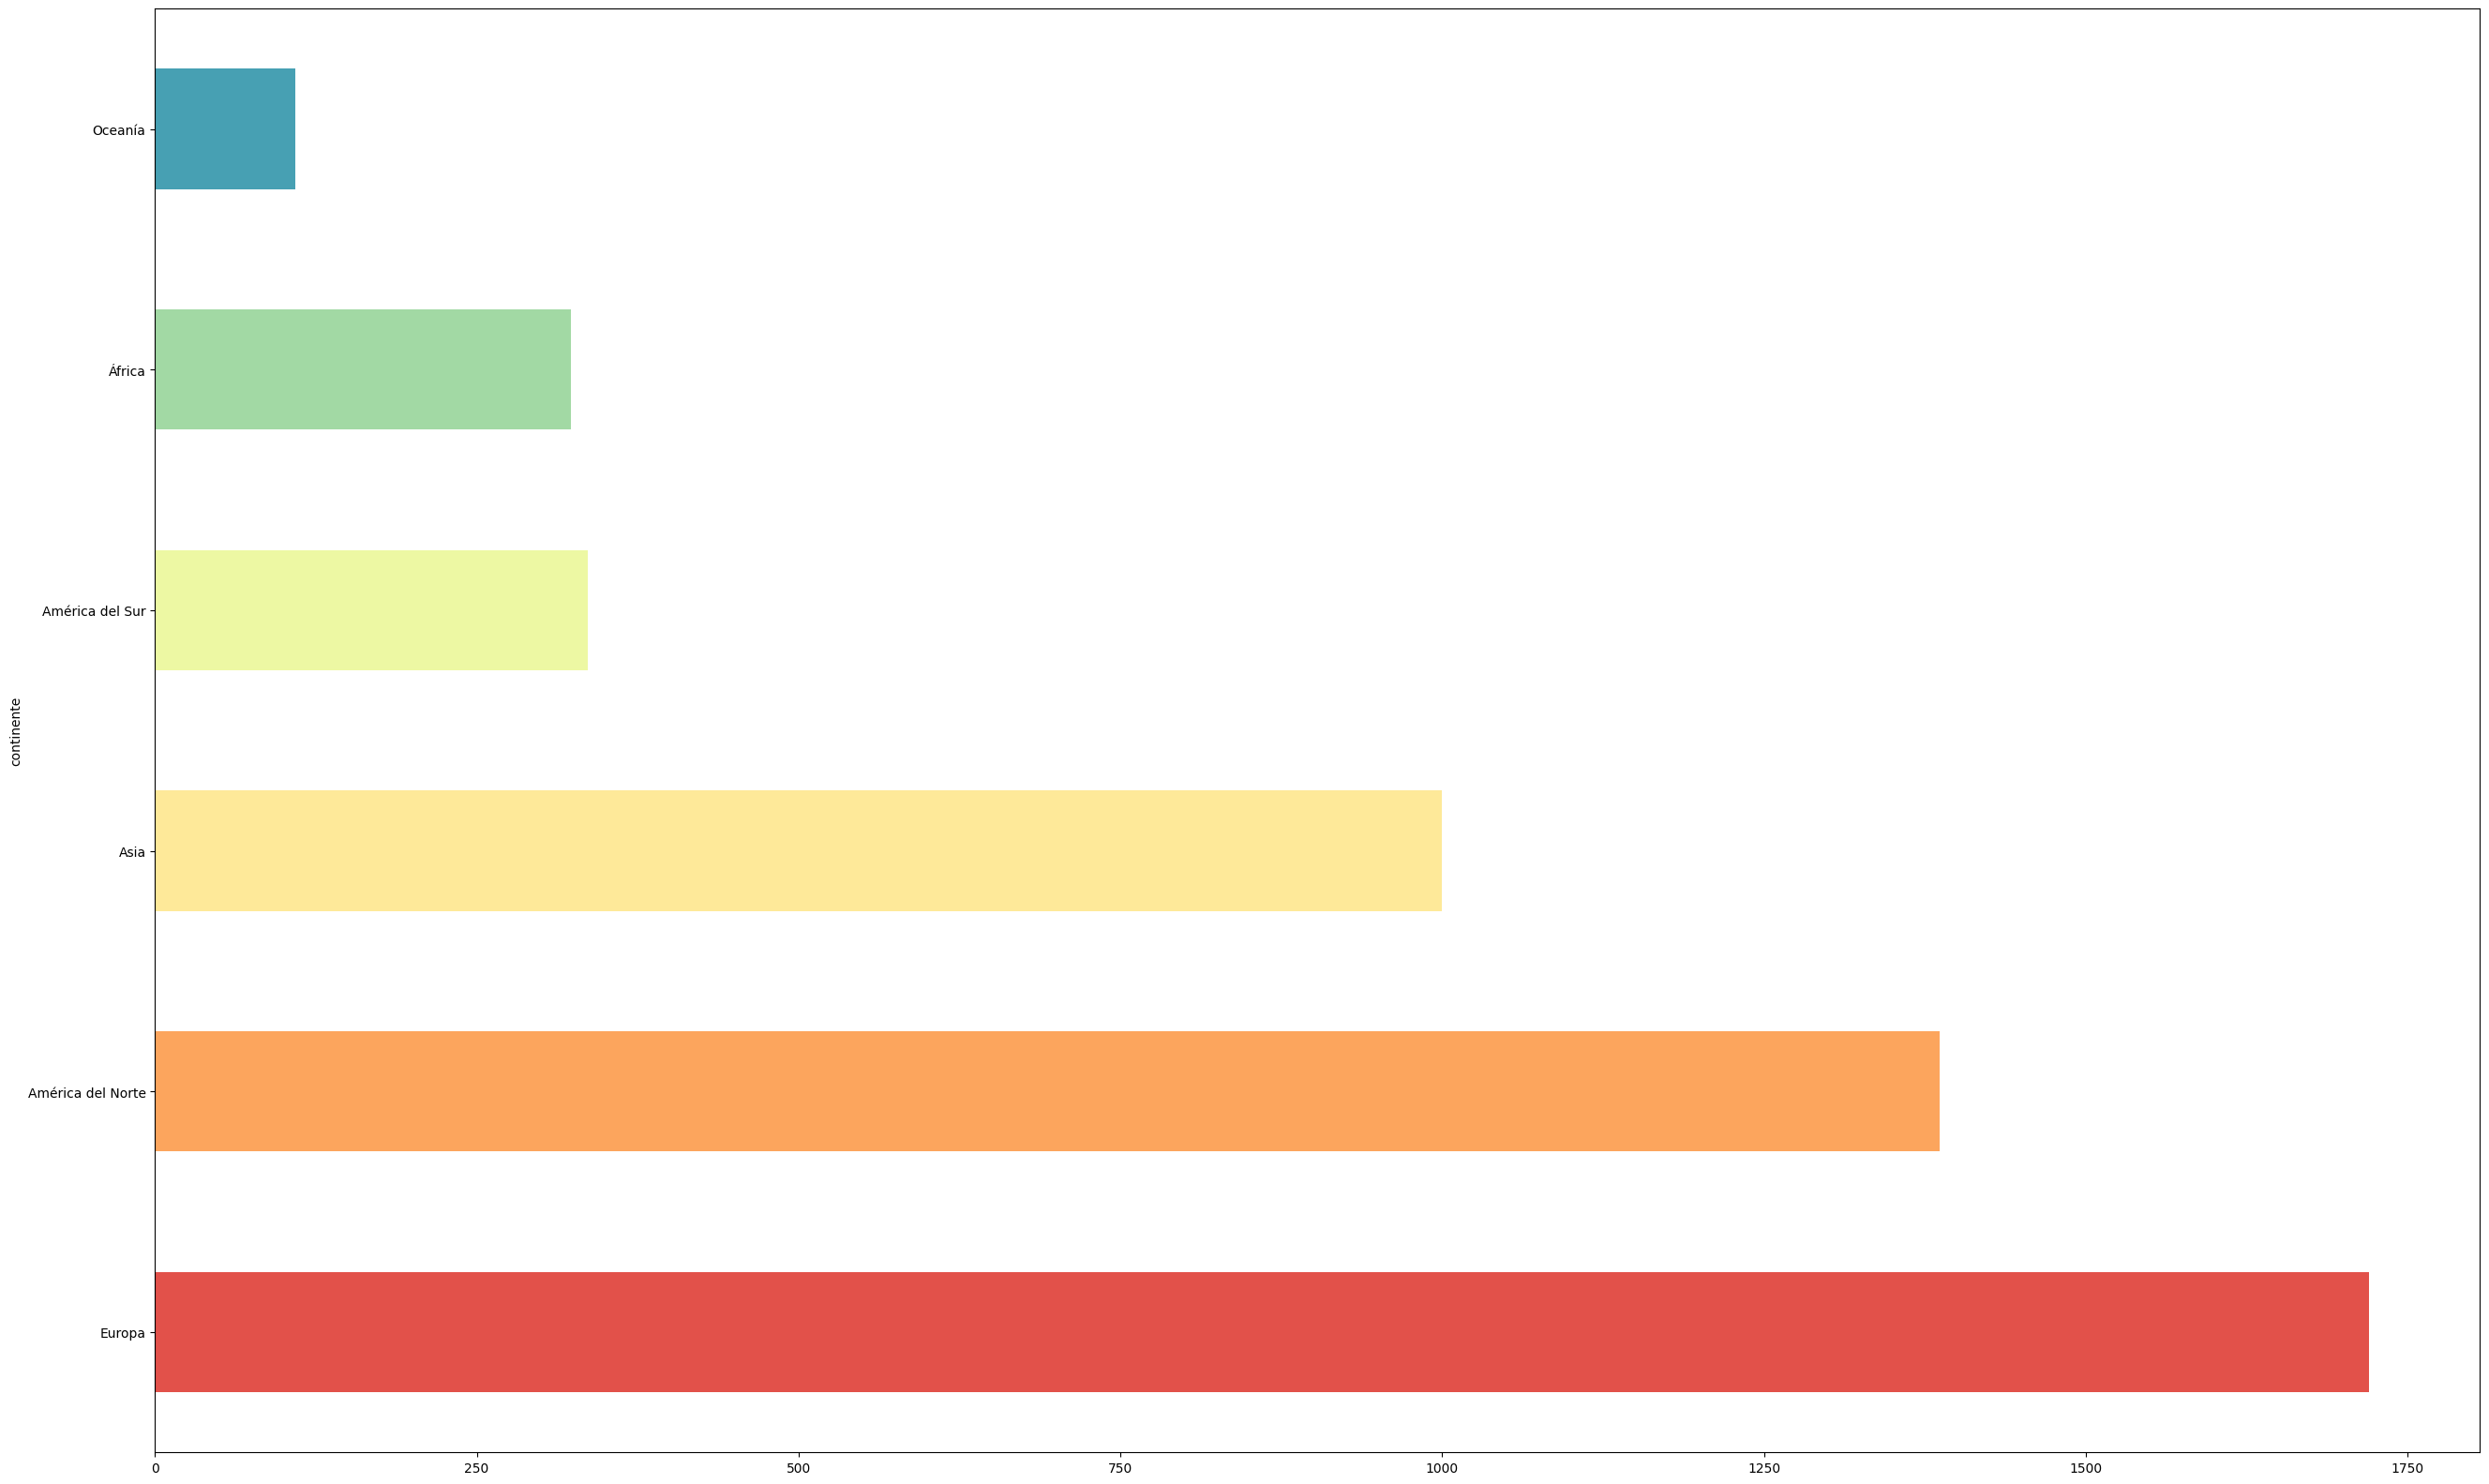

In [97]:
# Gráfico para variables cualitativas

plt.figure(figsize=(32,20))
df['continente'].value_counts().plot.barh(color= qualitative_colors)
plt.savefig("../graficas/01_EDA_barhplot_cuali.png")
;

In [98]:
df_final.to_pickle("../data/cost_of_living_pair1_limpio.pkl")
